# Claude

**Note:**
<div class="alert alert-block alert-info">

1. This notebook presents the output of Claude with little to no human assistance. Intervention is only introduced to ensure code is able to run and proceed to the next stage.
2. Boxes highlighted in yellow indicates warning. This indicates the step where we think the LLM produces a somewhat problematic output, or misses out on important thought process. Some minor modifications may be made to the LLM output to ensure the code proceeds to run.

In [2]:
import pandas as pd

# Load the dataset
hotel_data = pd.read_csv('hotel_reservation.csv')

# Check for missing values
print("Missing values per column:")
print(hotel_data.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {hotel_data.duplicated().sum()}")

# Check for outliers in numerical columns
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                  'avg_price_per_room', 'no_of_special_requests']

for col in numerical_cols:
    print(f"\nOutliers in {col}:")
    print(hotel_data[col].describe())

# Check for invalid values in categorical columns
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'booking_status']

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(hotel_data[col].unique())

# Check for consistency in date columns
print("\nDate consistency checks:")
print(hotel_data[['arrival_year', 'arrival_month', 'arrival_date']].describe())

# Check for unique identifier integrity
print(f"\nUnique Booking_IDs: {hotel_data['Booking_ID'].nunique()}")
print(f"Duplicate Booking_IDs: {hotel_data['Booking_ID'].duplicated().sum()}")

Missing values per column:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Number of duplicate rows: 0

Outliers in no_of_adults:
count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000

Numerical Variables:


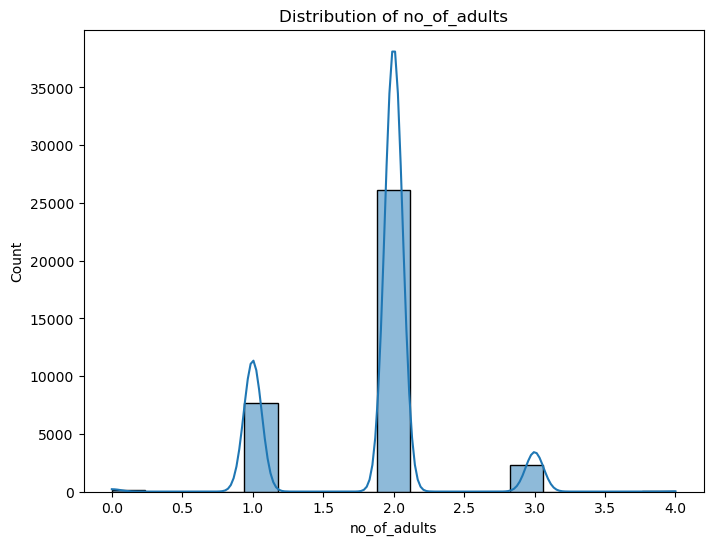

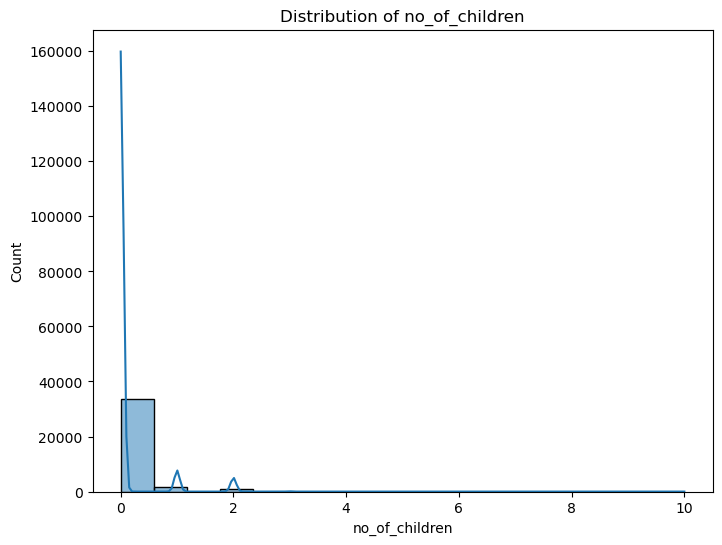

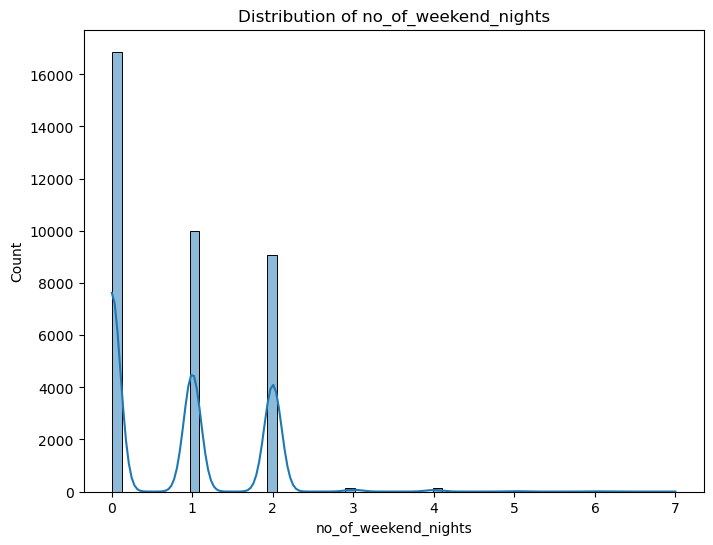

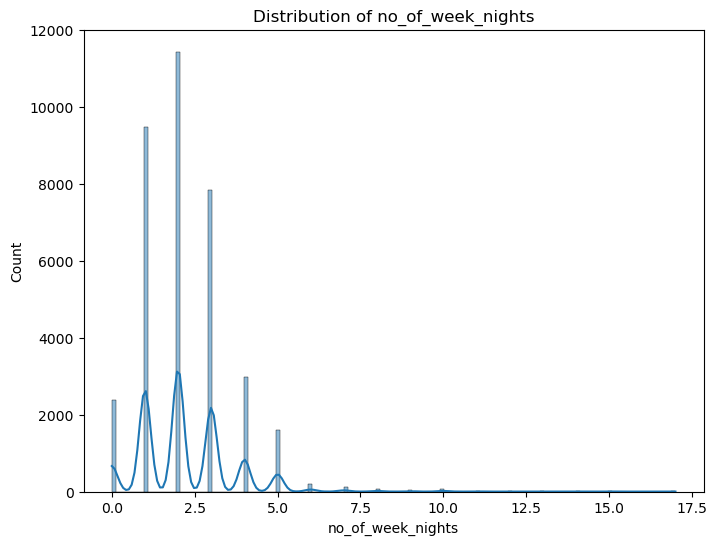

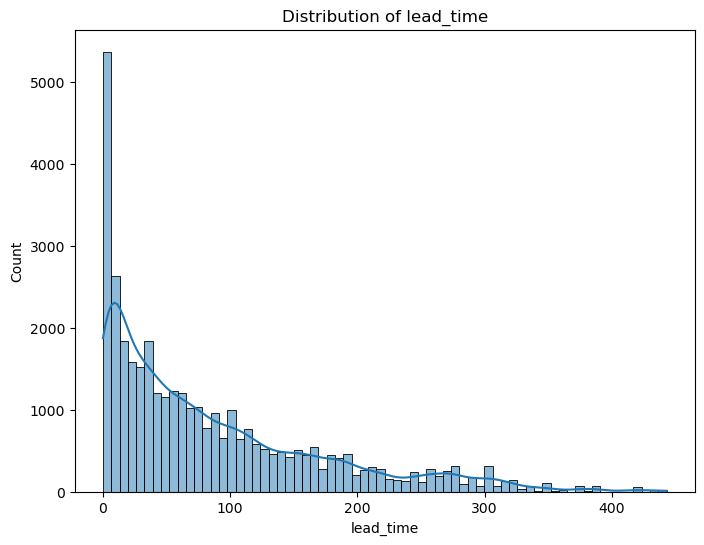

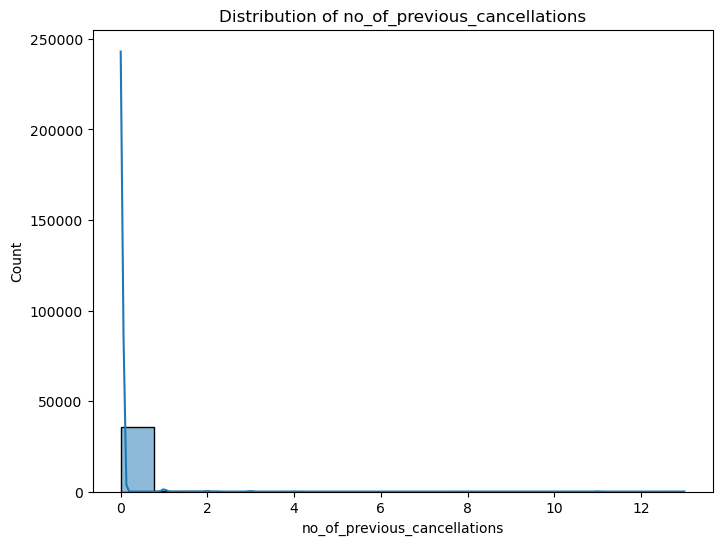

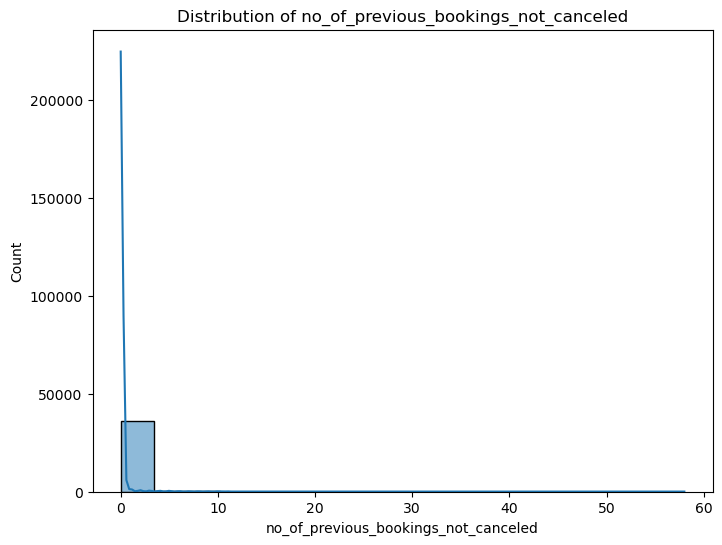

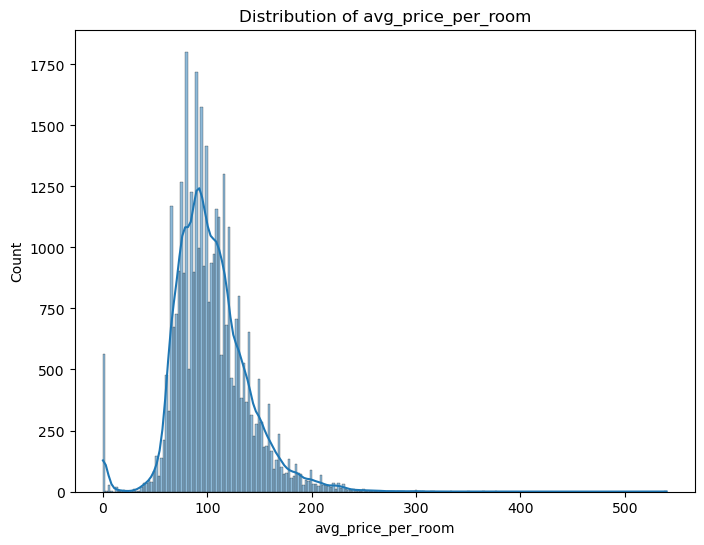

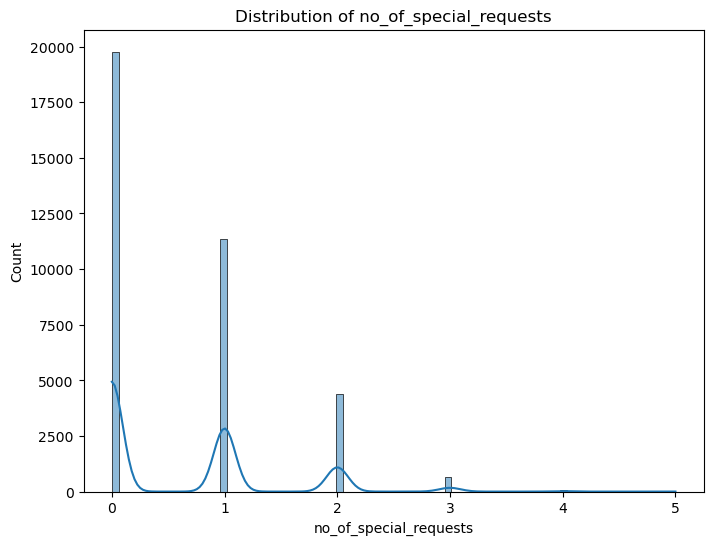


Categorical Variables:


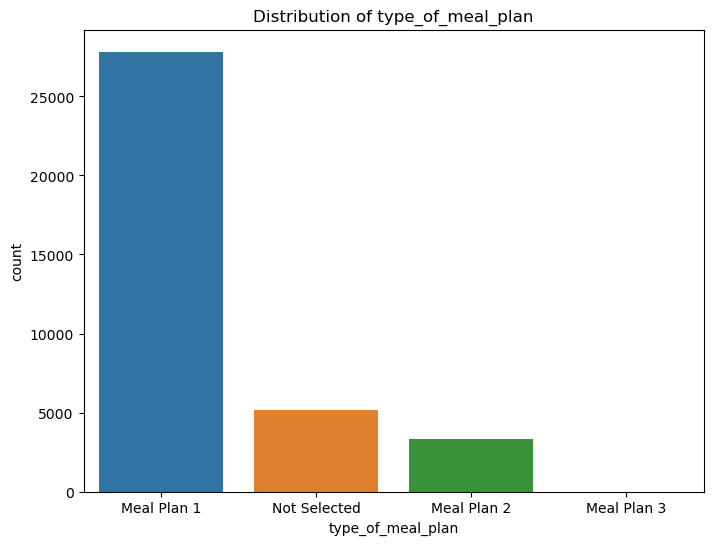

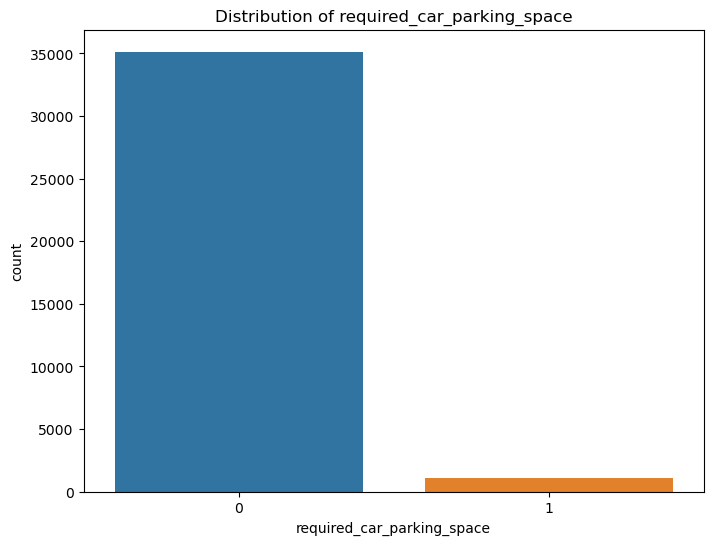

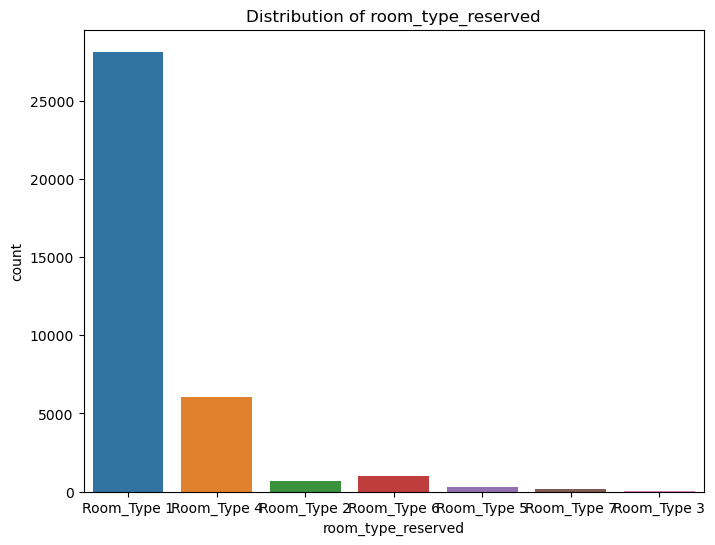

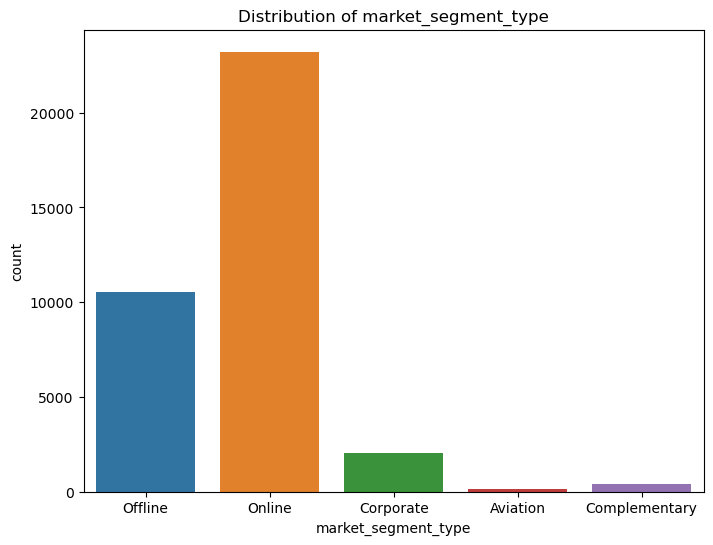

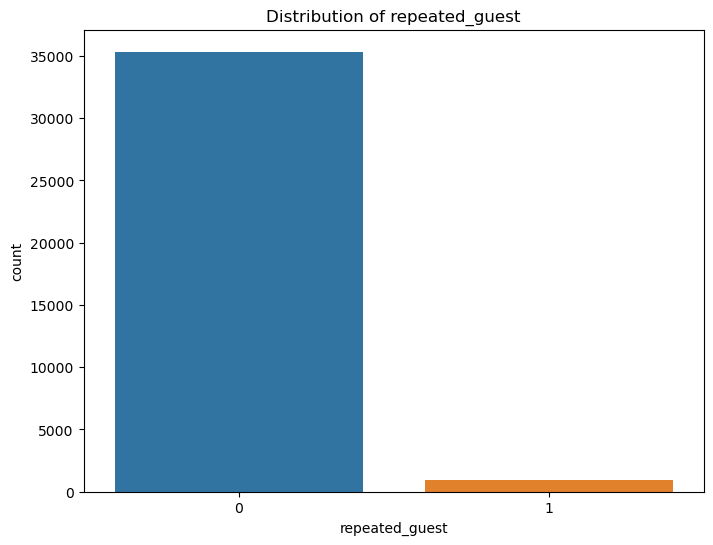

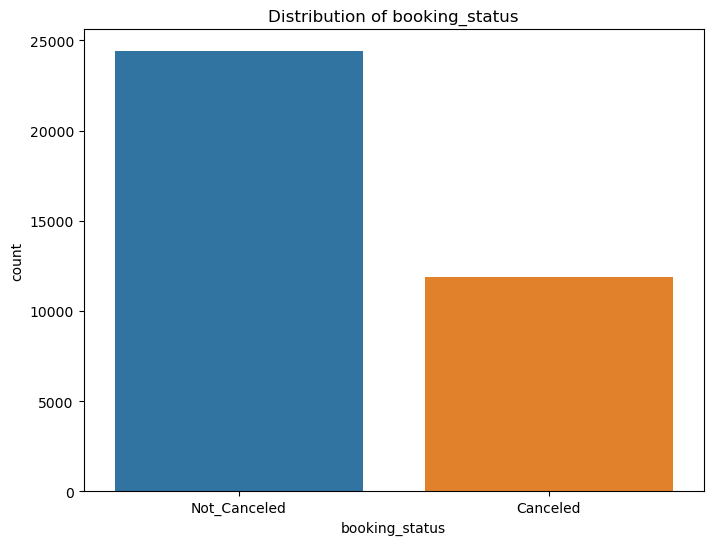

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
hotel_data = pd.read_csv('hotel_reservation.csv')

# Univariate analysis of numerical variables
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                  'avg_price_per_room', 'no_of_special_requests']

print("Numerical Variables:")
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hotel_data, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Univariate analysis of categorical variables
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest', 'booking_status']

print("\nCategorical Variables:")
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=hotel_data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

Relationship between numerical variables and booking_status:


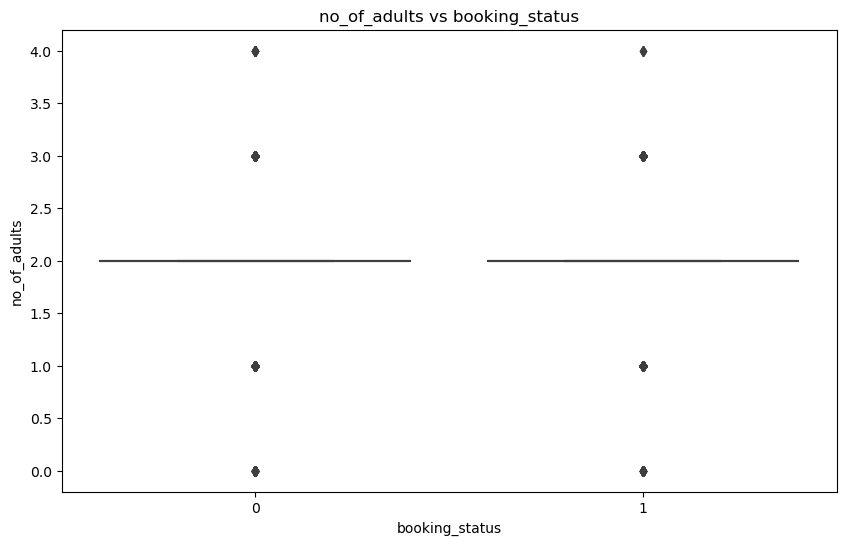

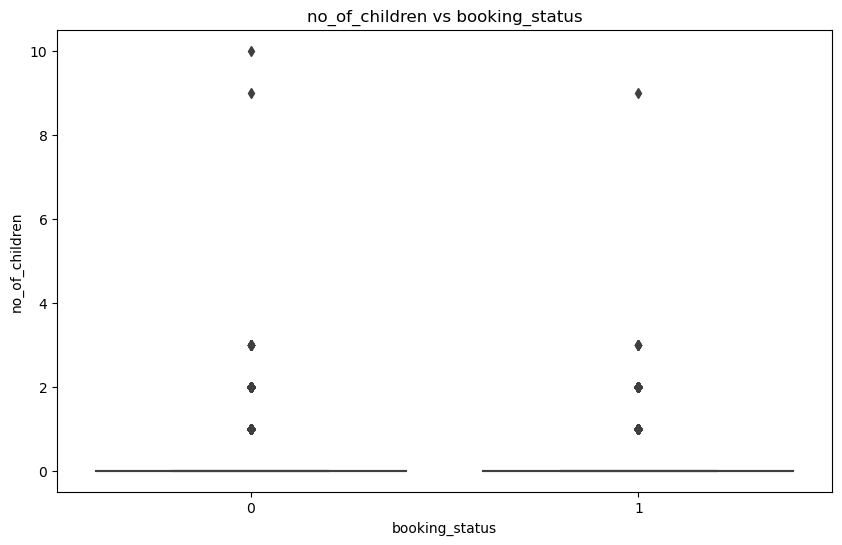

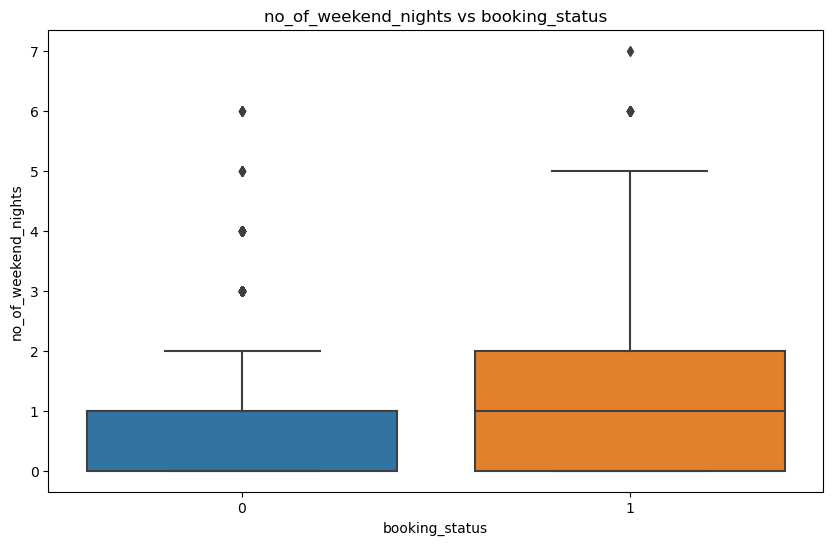

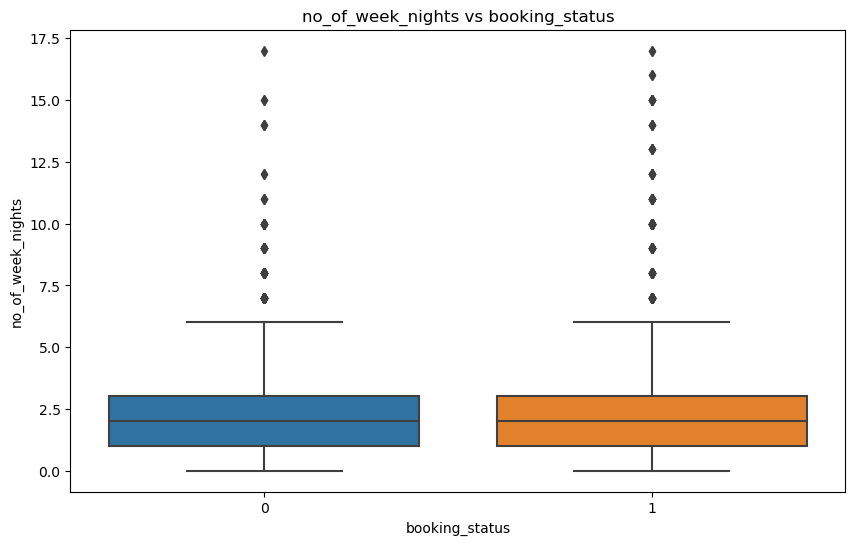

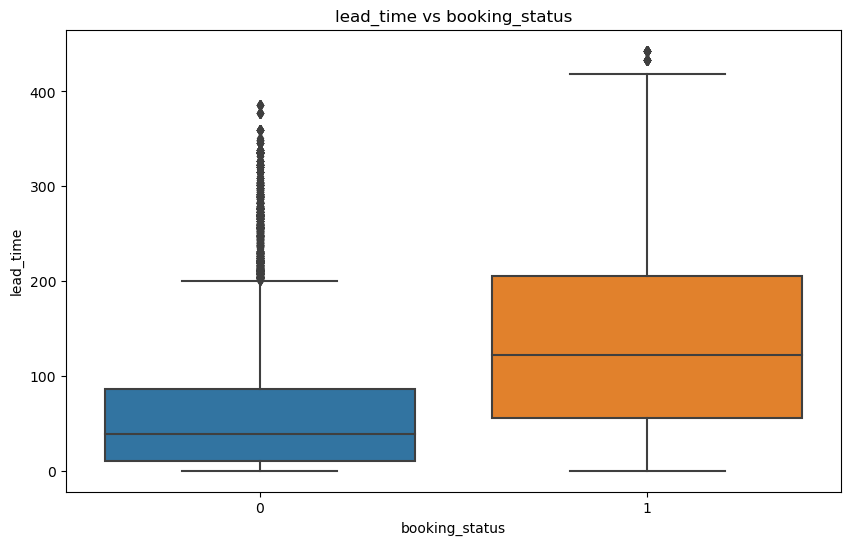

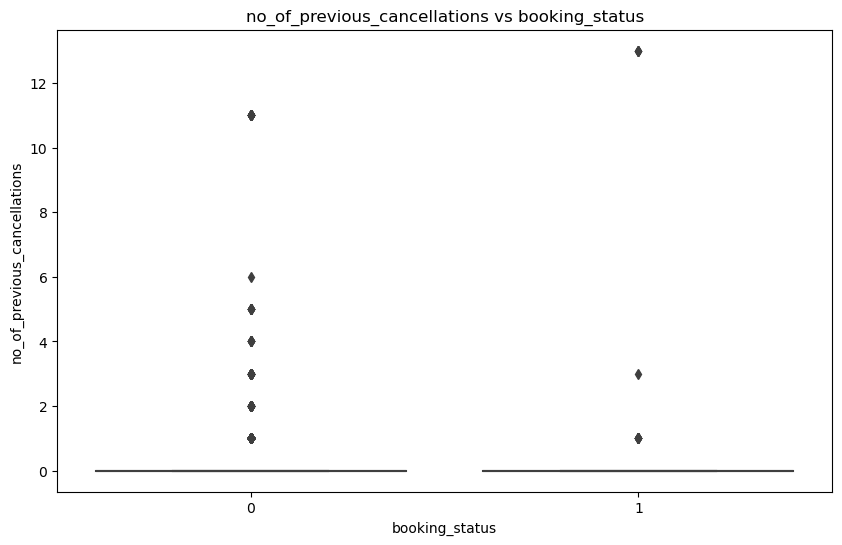

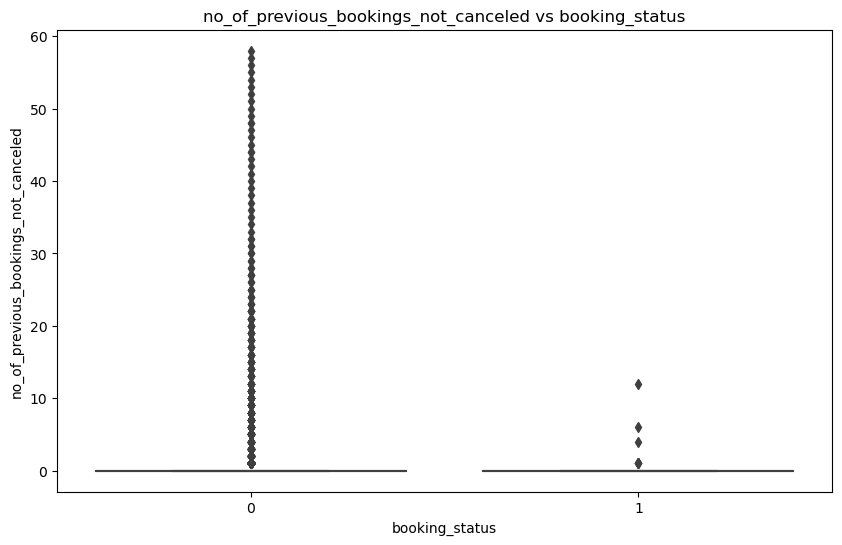

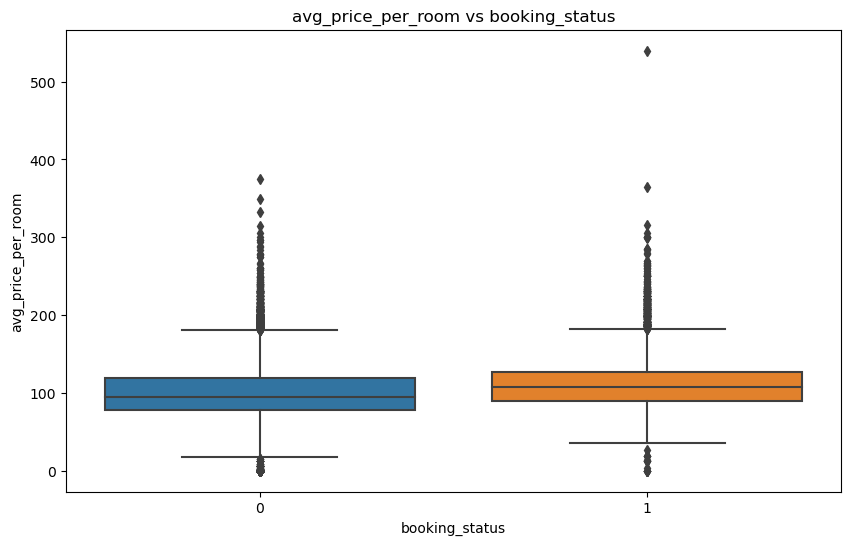

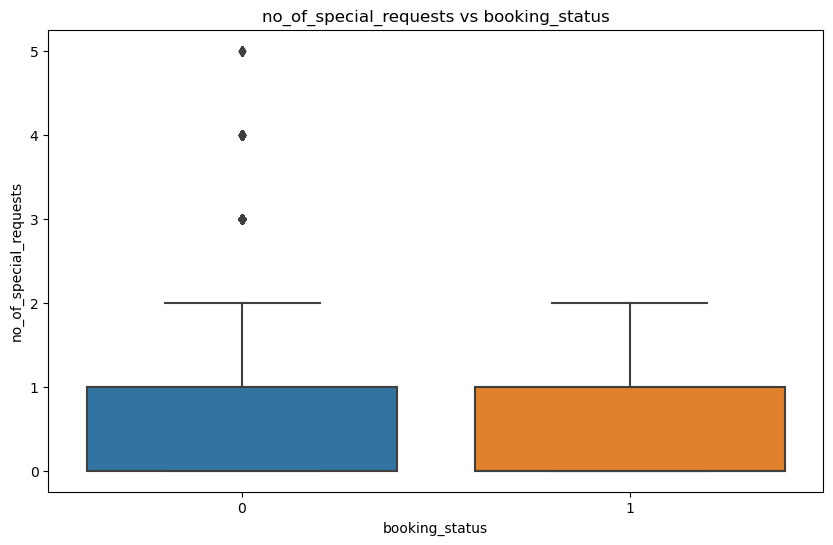


Relationship between categorical variables and booking_status:


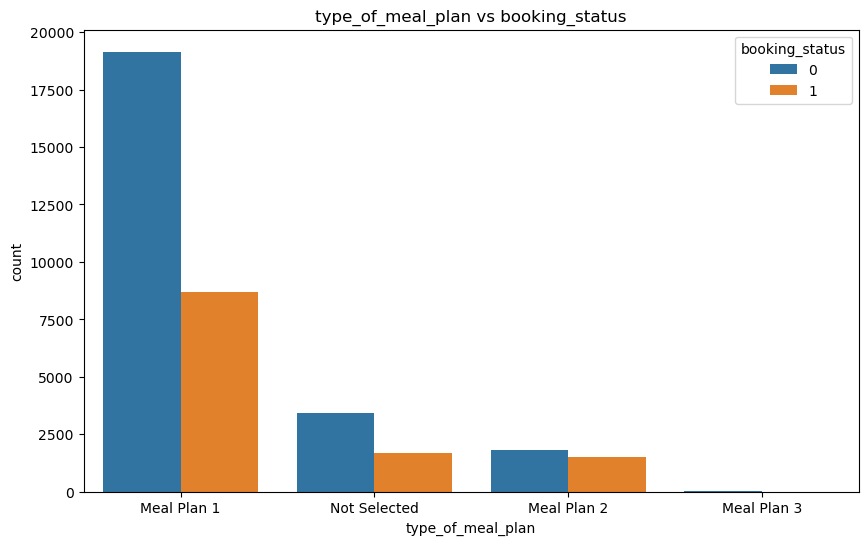

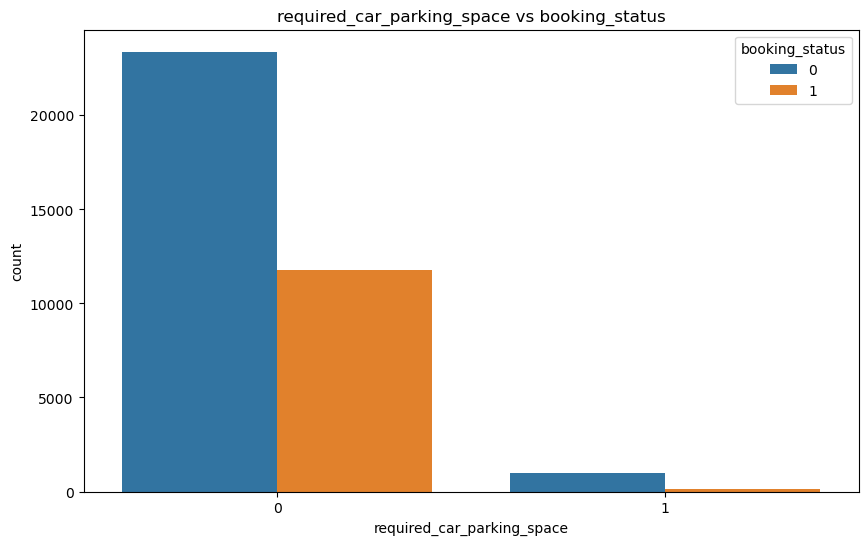

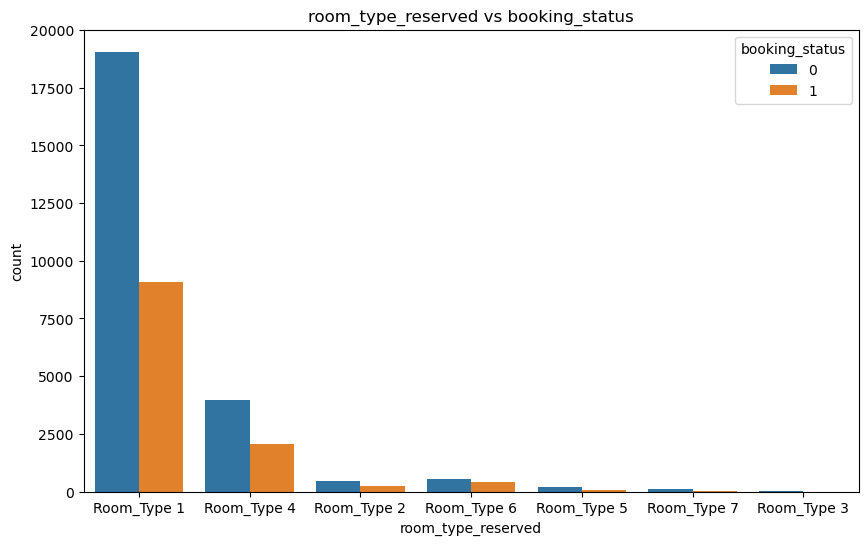

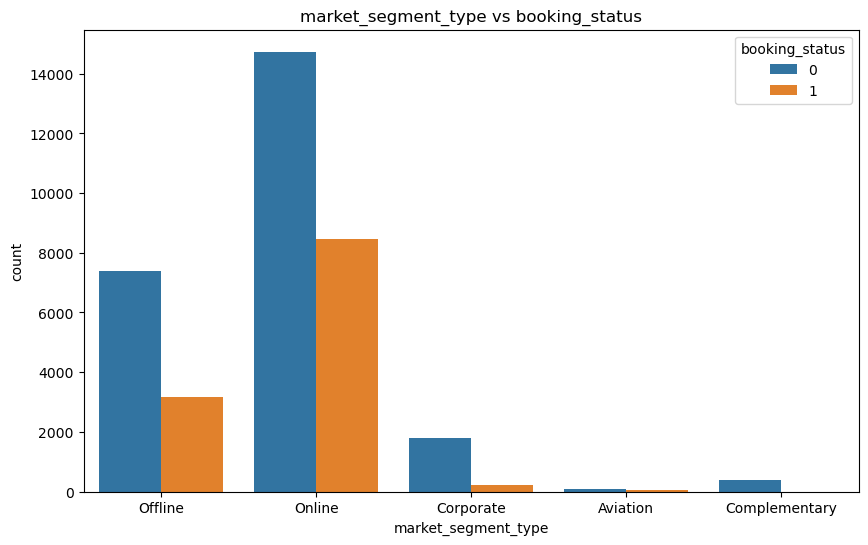

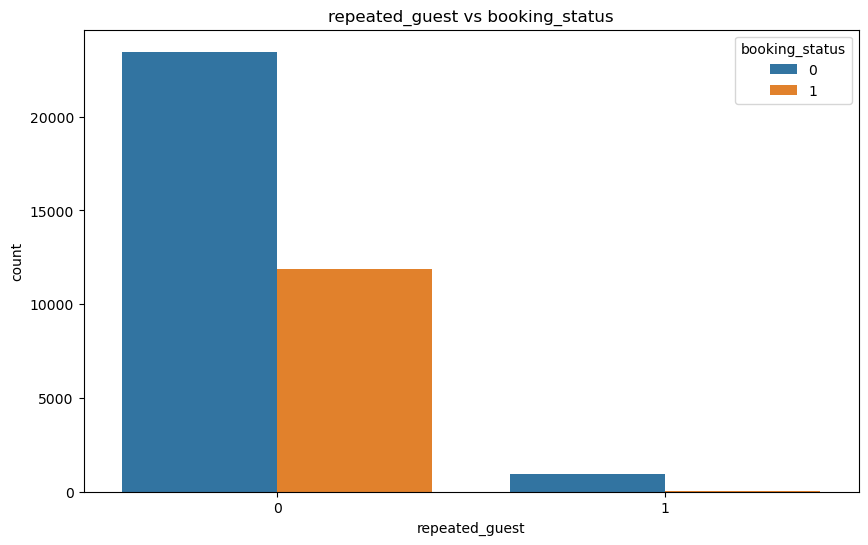

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
hotel_data = pd.read_csv('hotel_reservation.csv')

# Convert booking_status to binary
hotel_data['booking_status'] = hotel_data['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# Bivariate analysis with numerical variables
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                  'avg_price_per_room', 'no_of_special_requests']

print("Relationship between numerical variables and booking_status:")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='booking_status', y=col, data=hotel_data)
    plt.title(f"{col} vs booking_status")
    plt.show()

# Bivariate analysis with categorical variables
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest']

print("\nRelationship between categorical variables and booking_status:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='booking_status', data=hotel_data)
    plt.title(f"{col} vs booking_status")
    plt.show()

Relationships between numerical variables:


C:\Users\ytyyu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


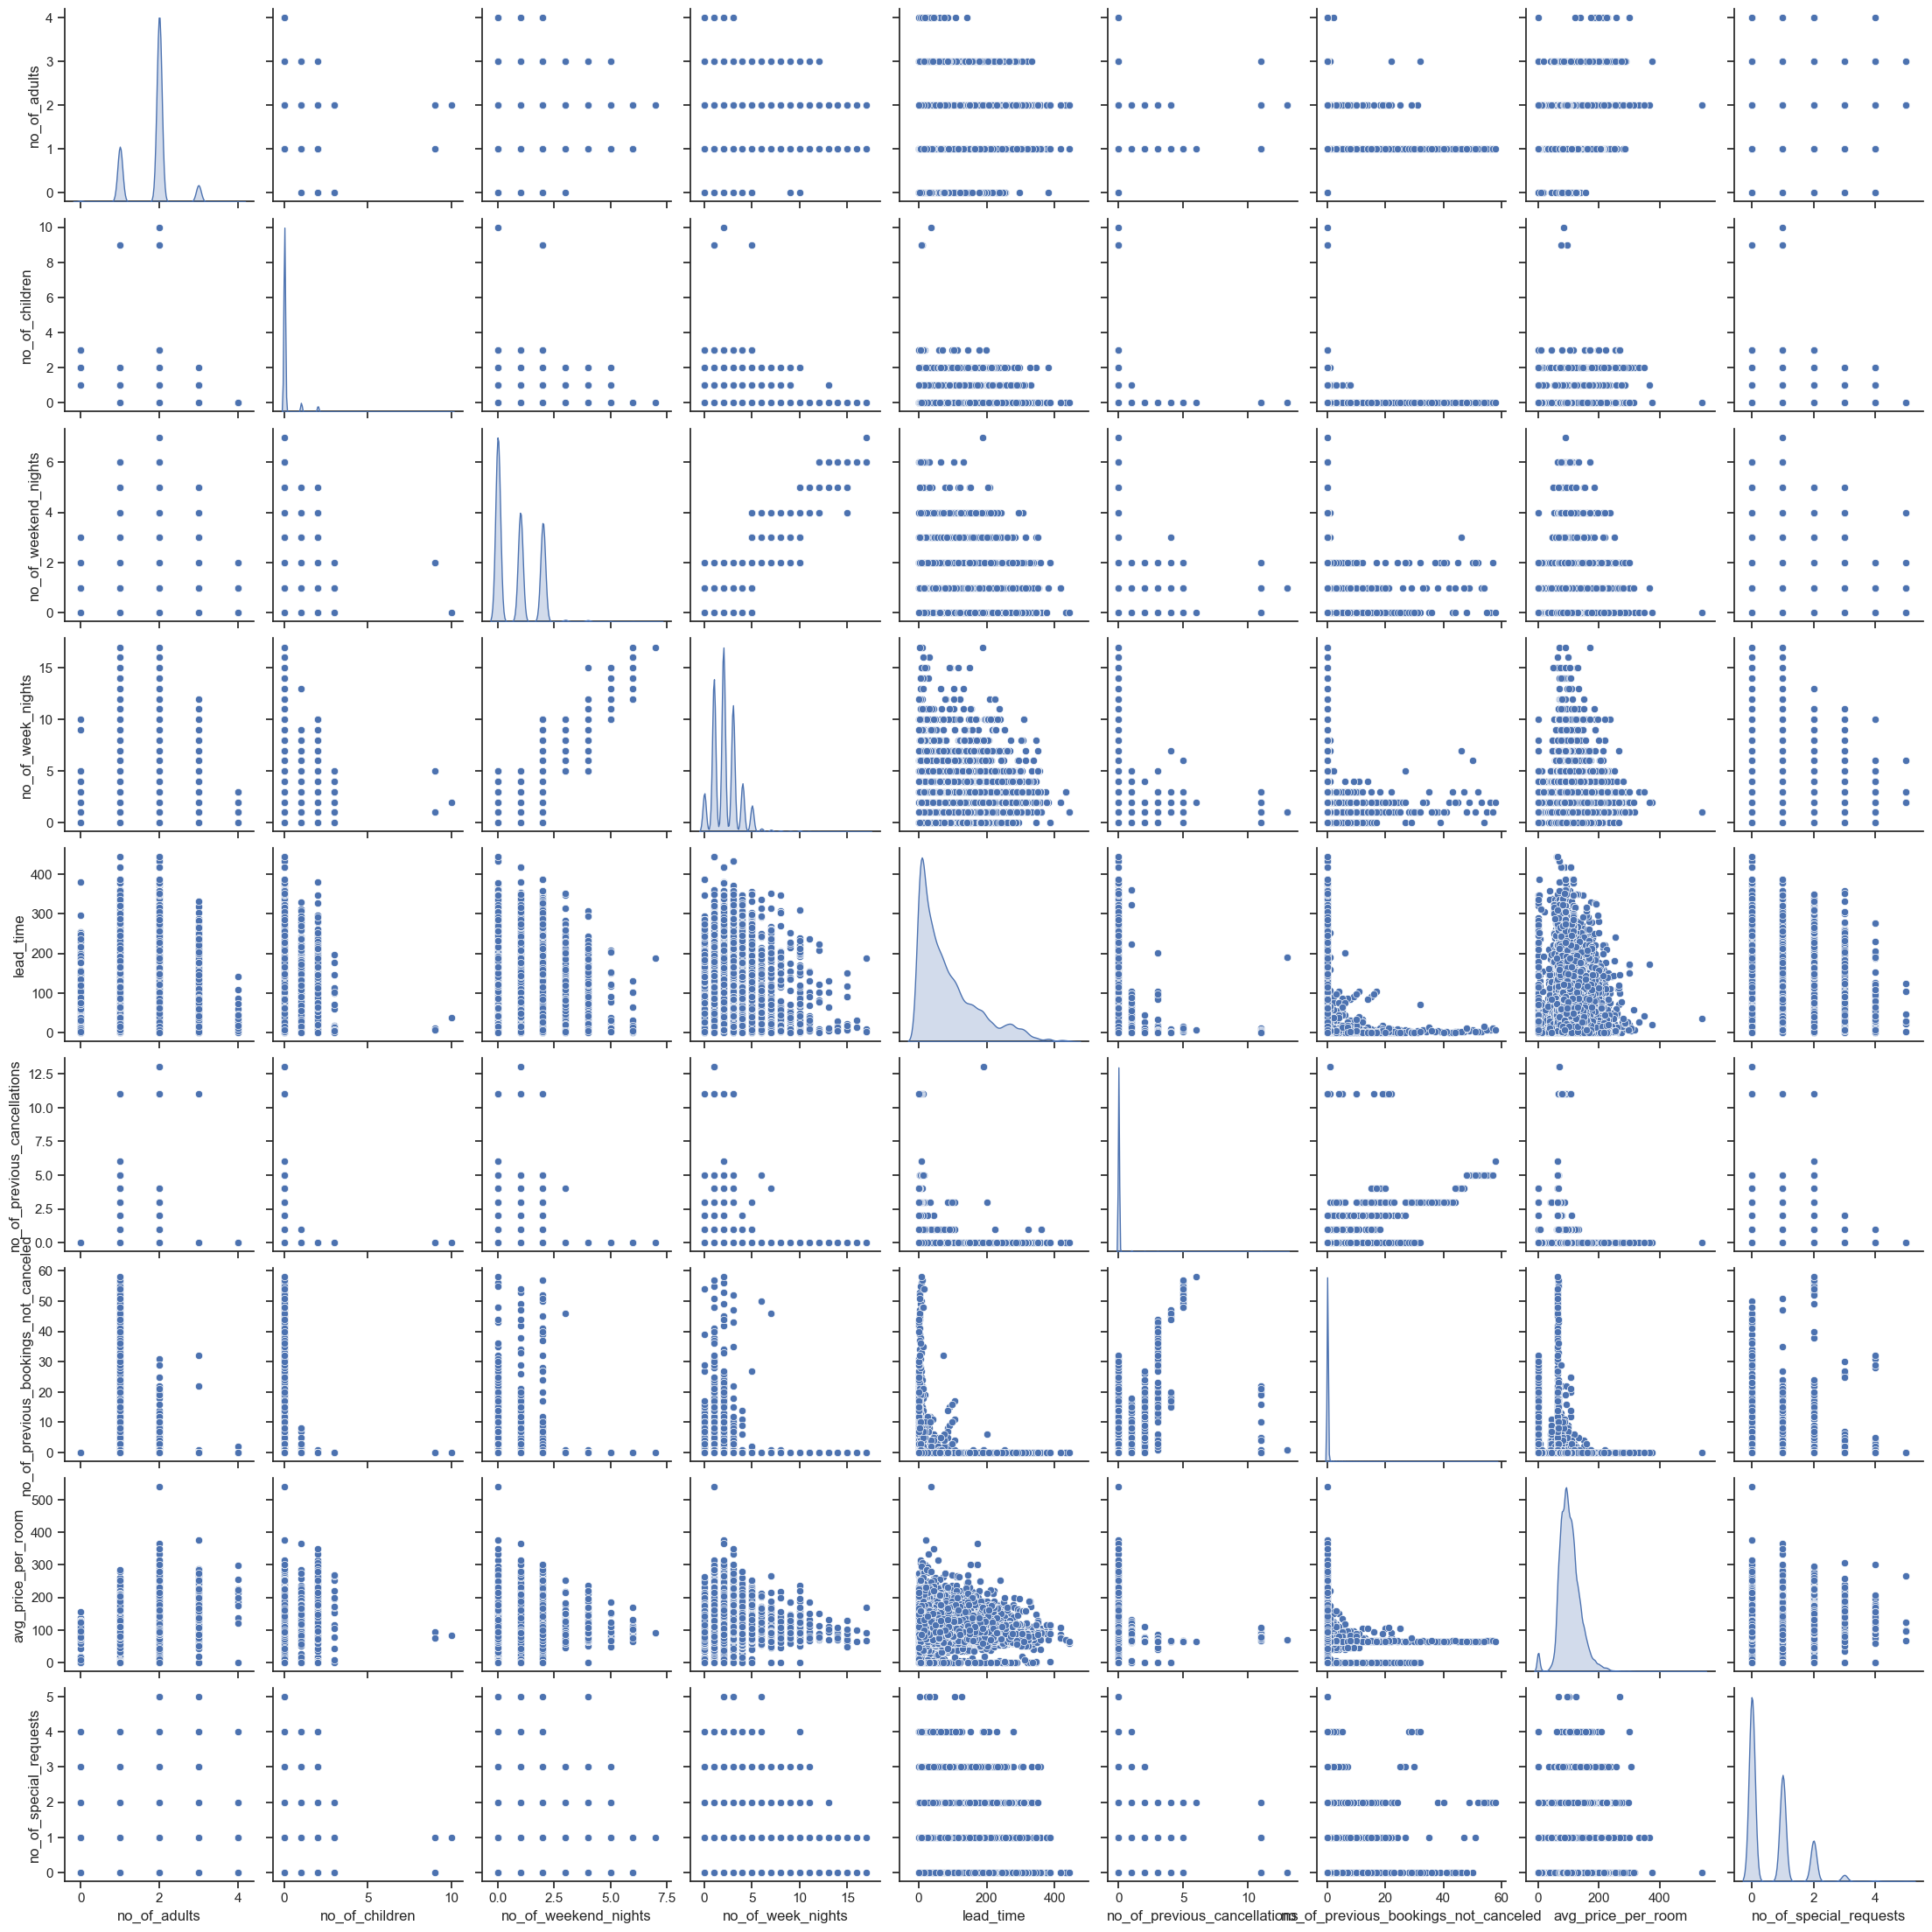


Relationships between numerical and categorical variables:


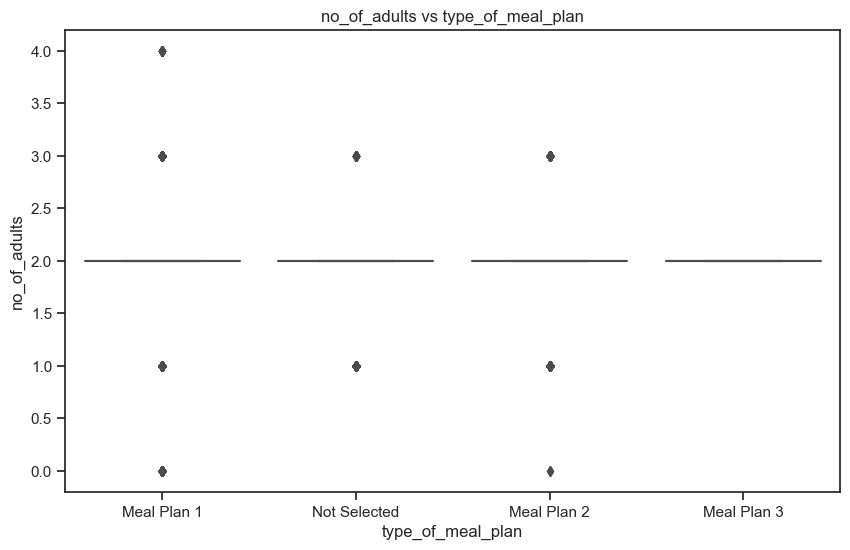

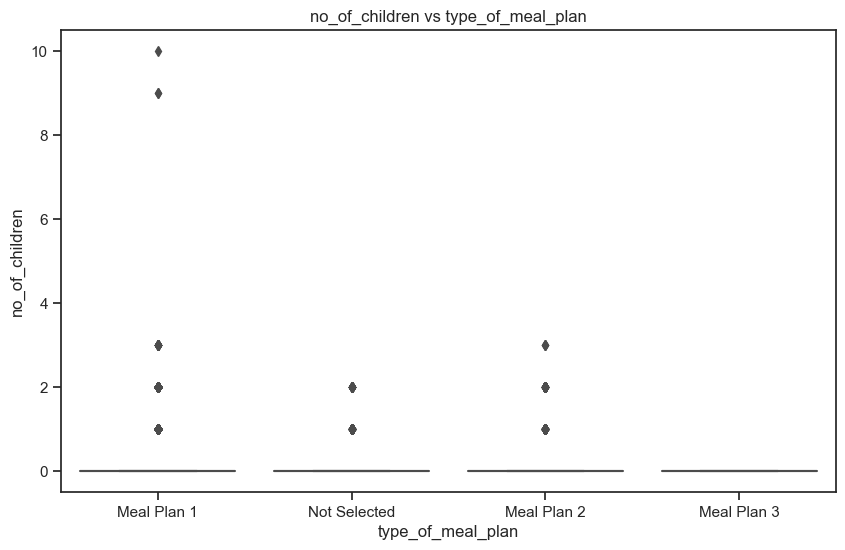

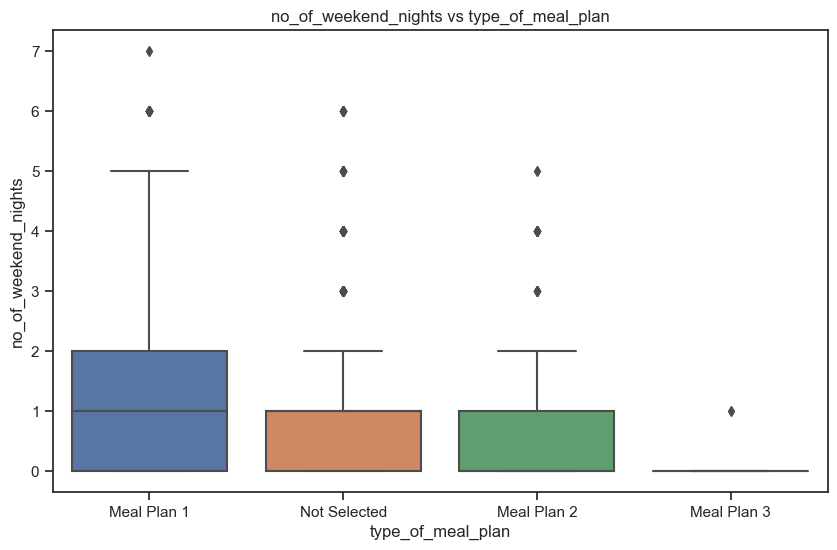

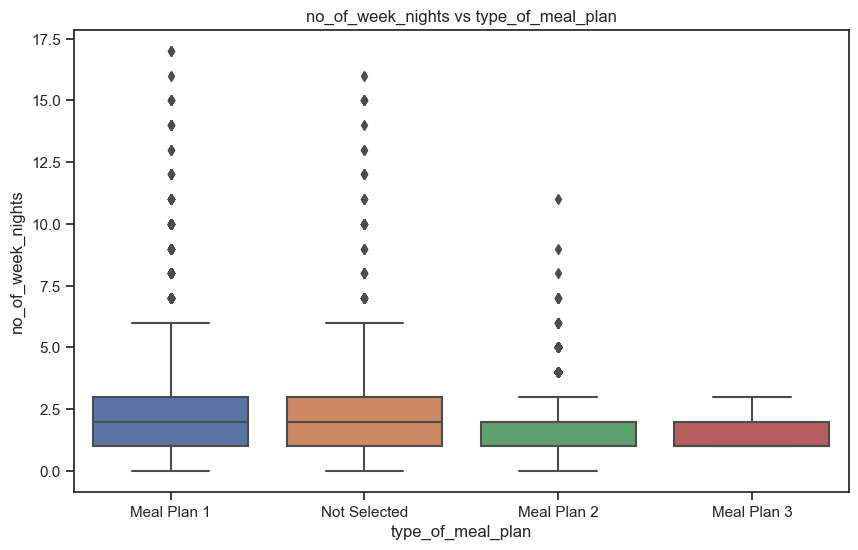

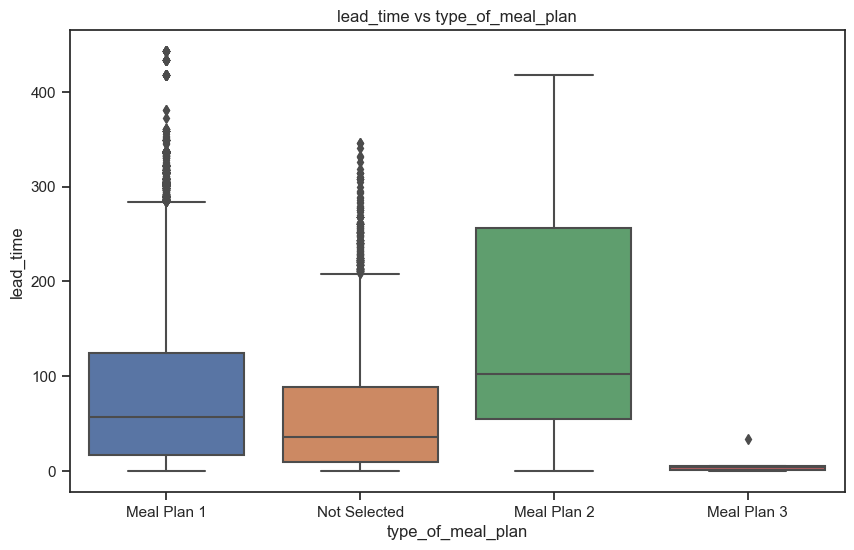

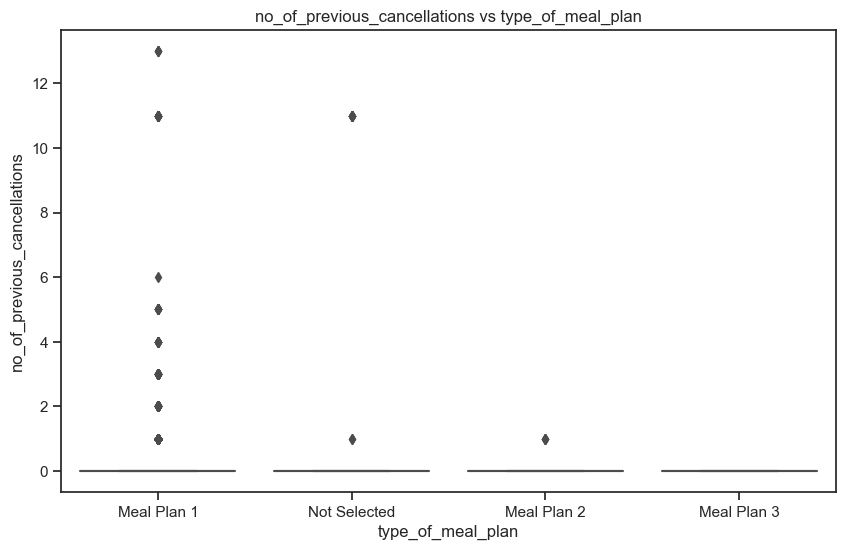

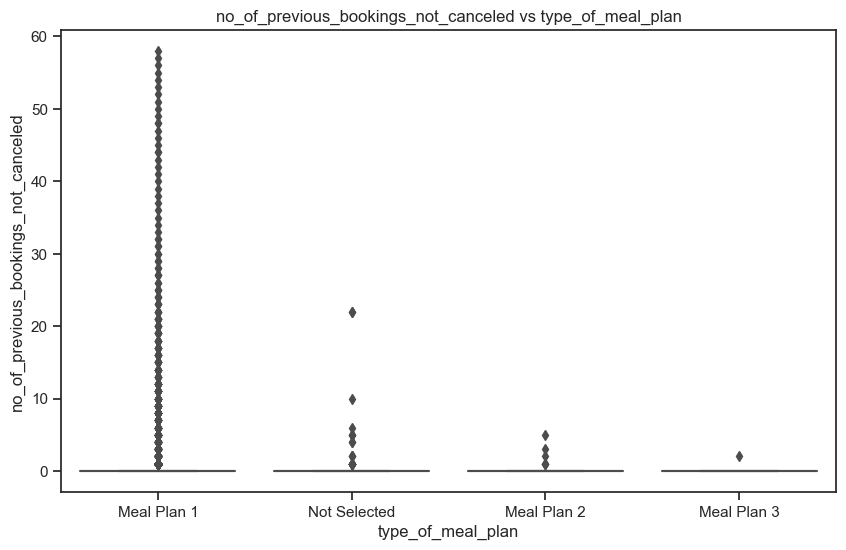

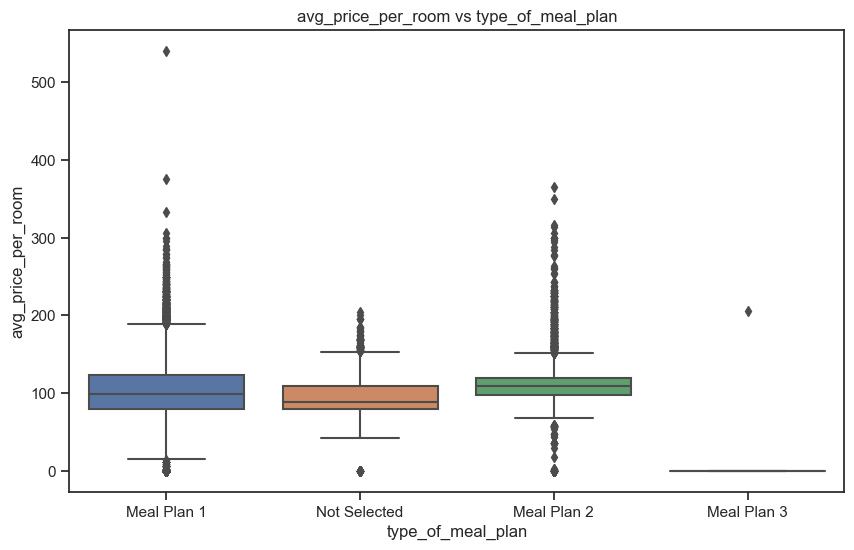

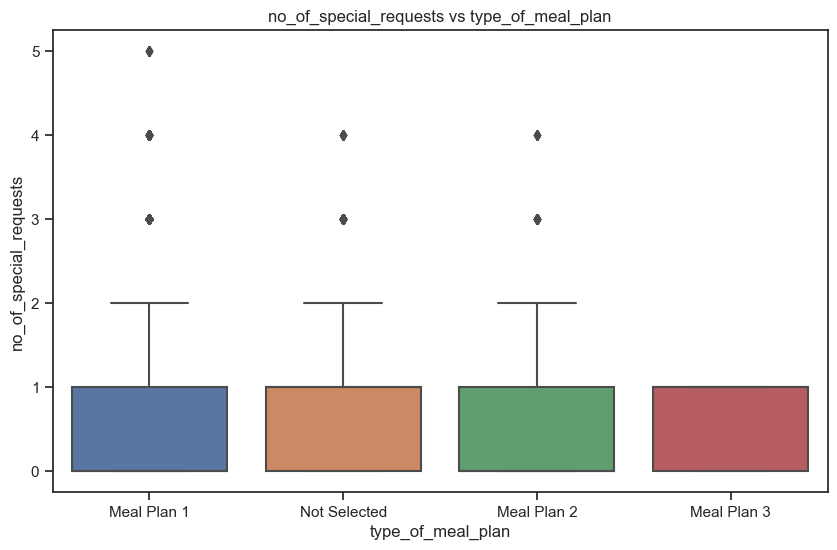

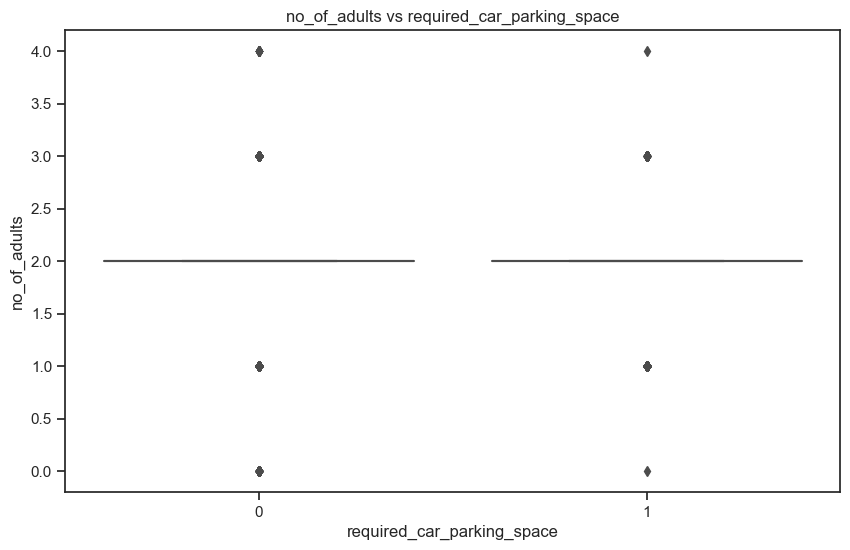

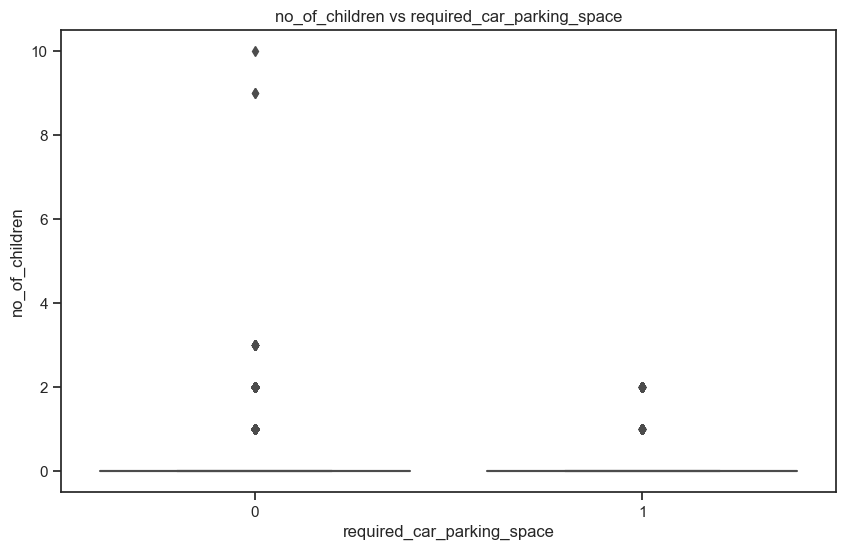

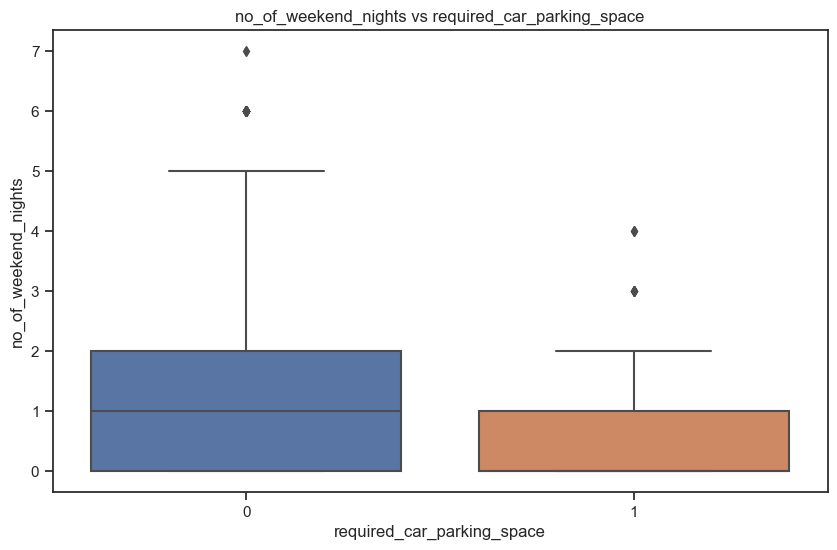

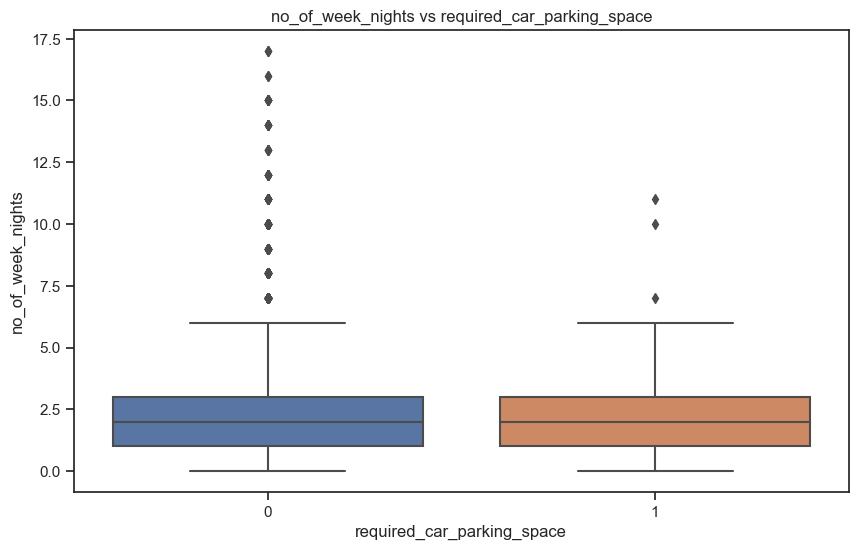

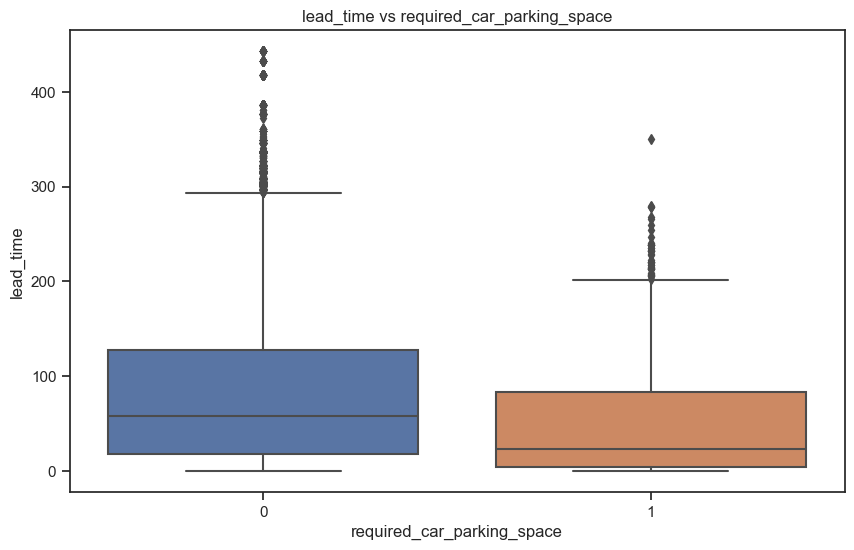

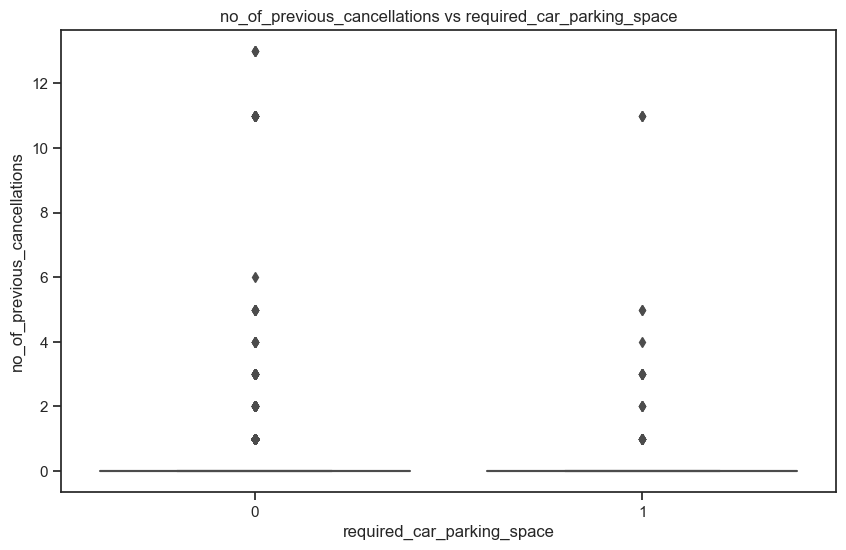

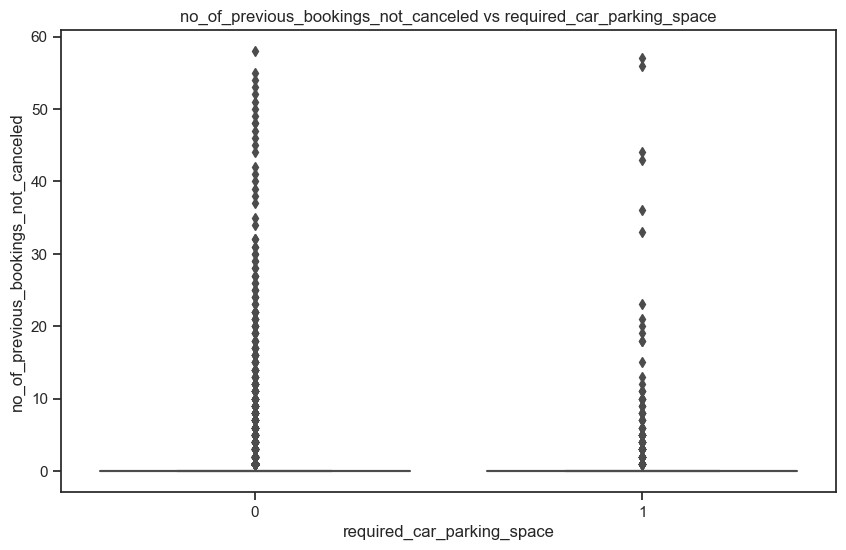

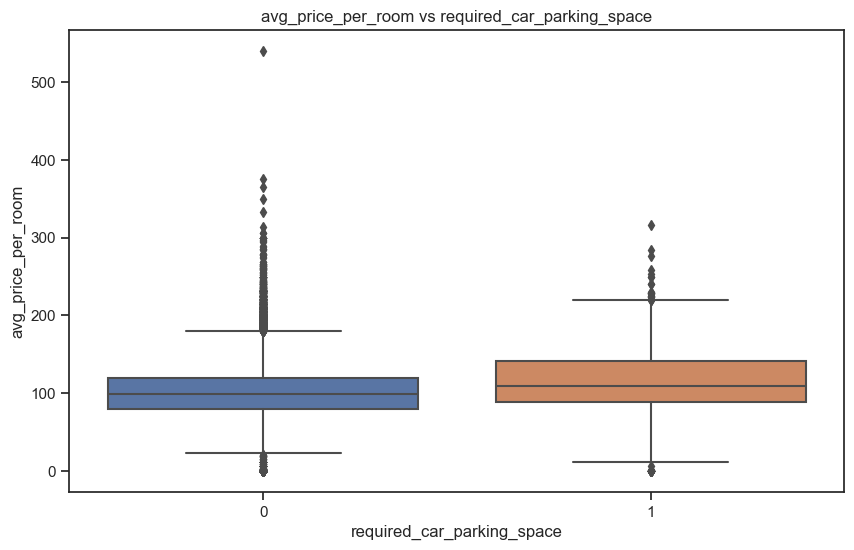

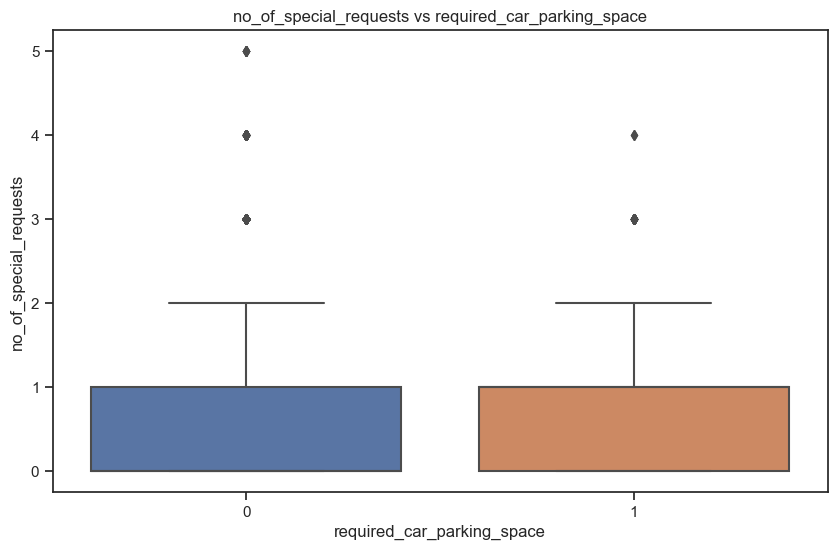

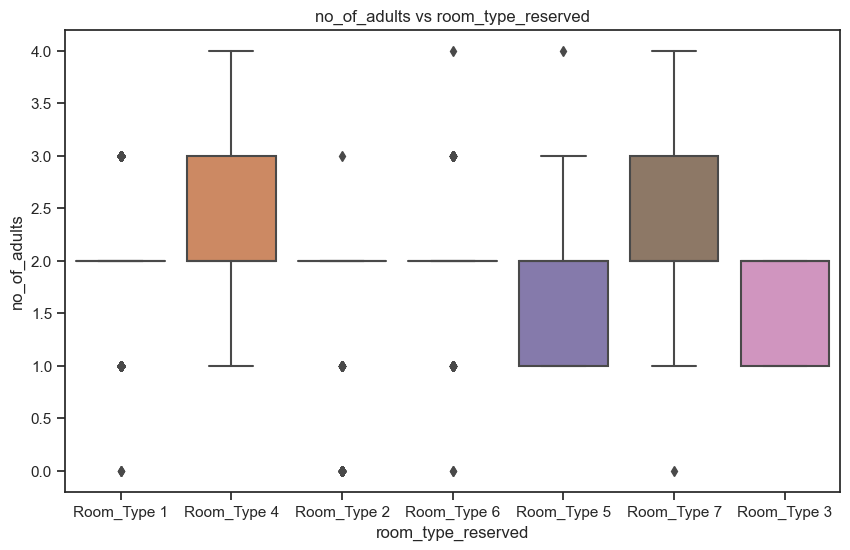

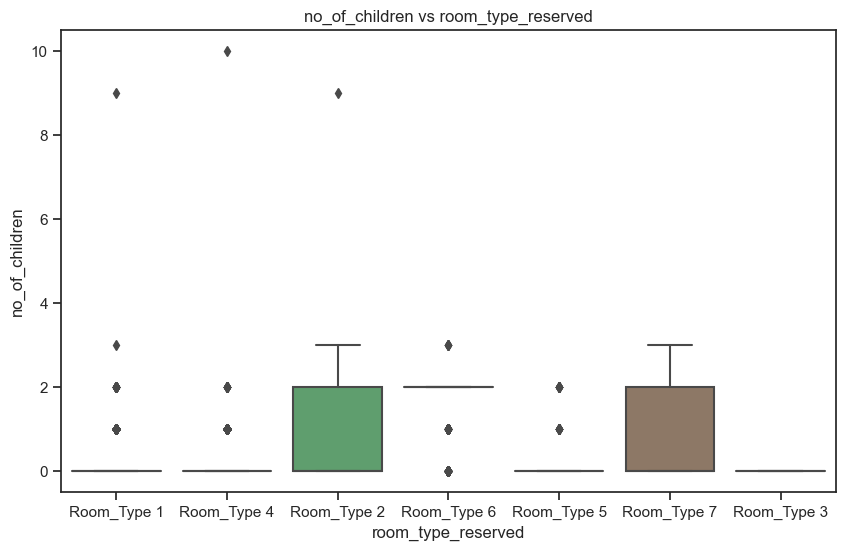

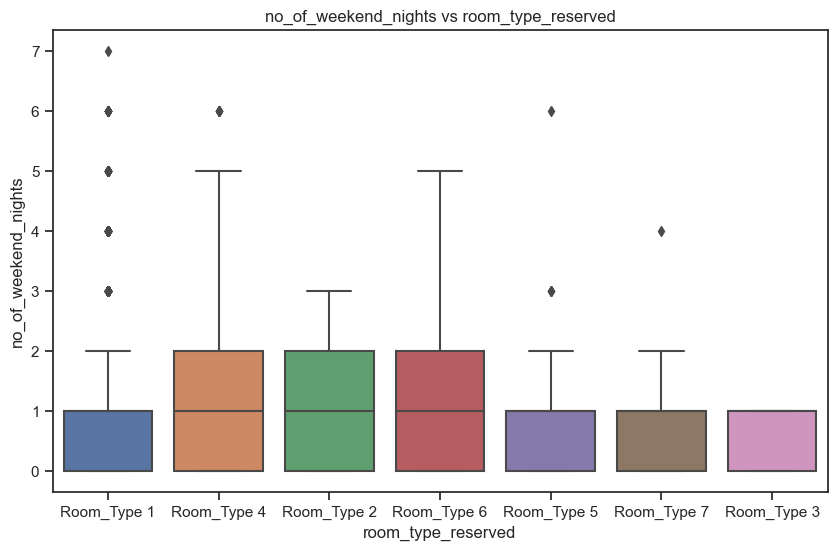

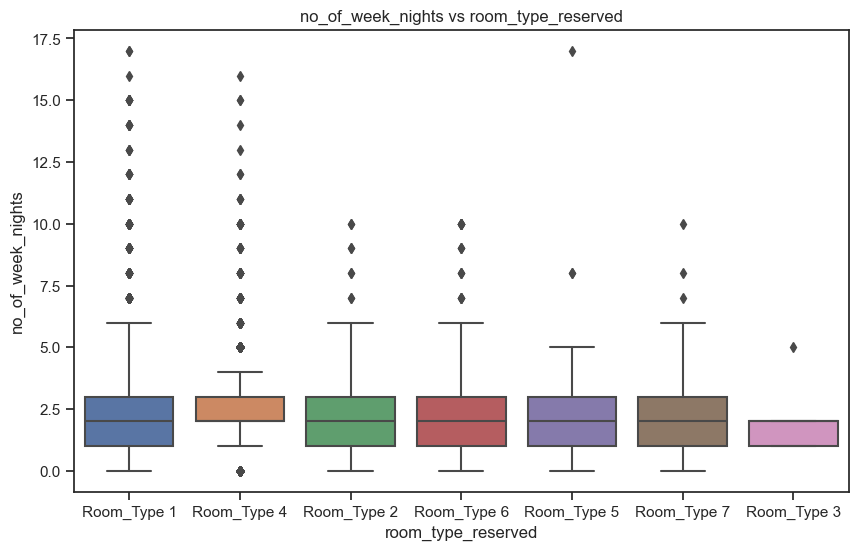

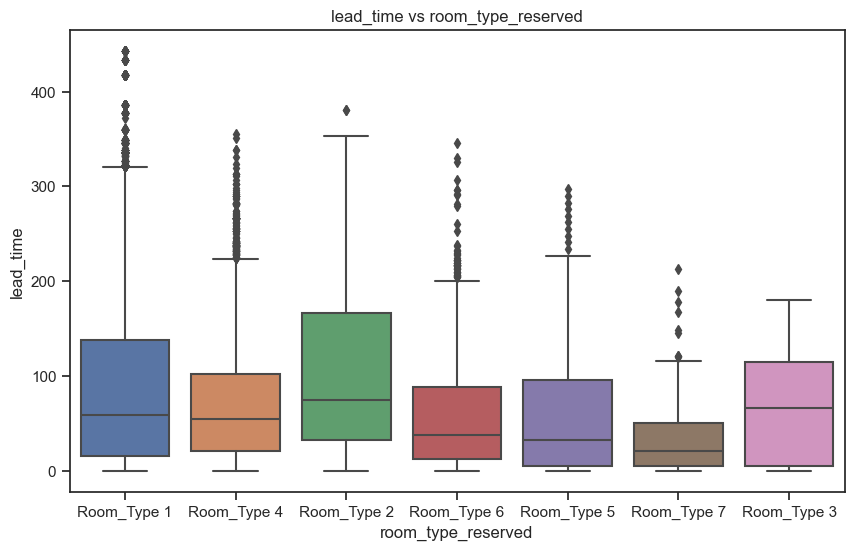

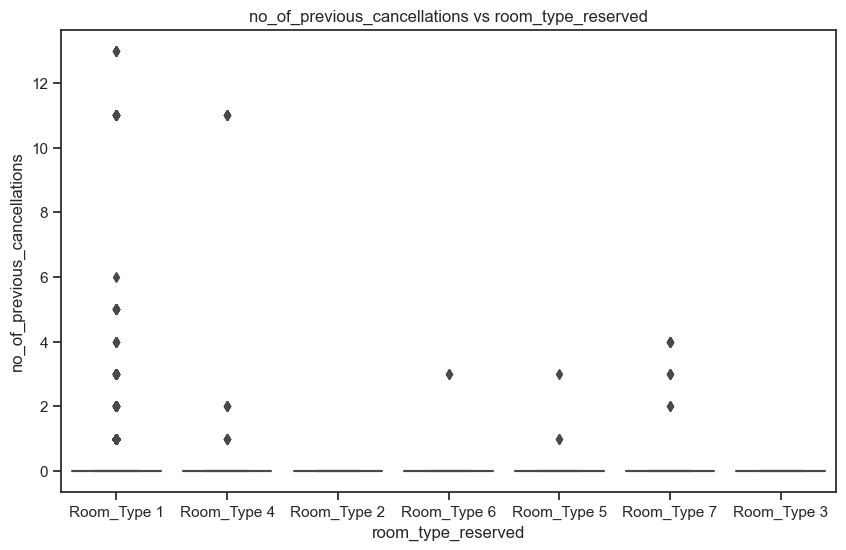

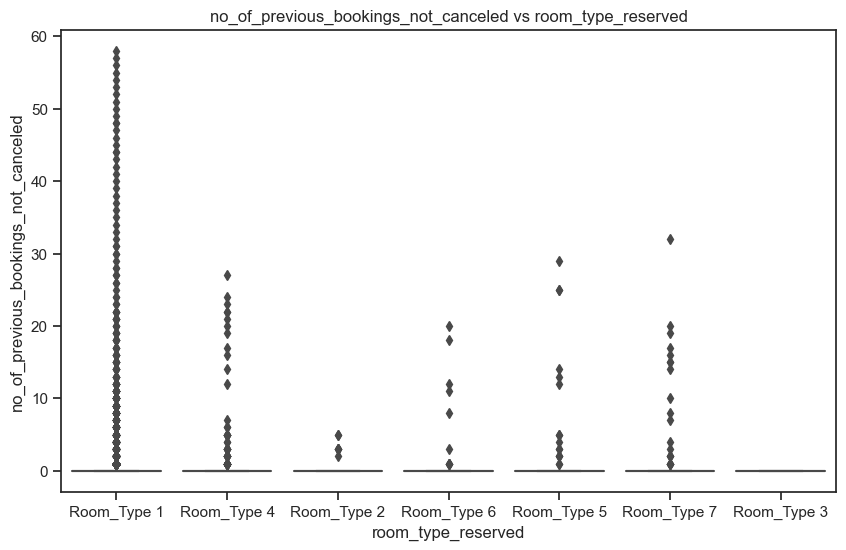

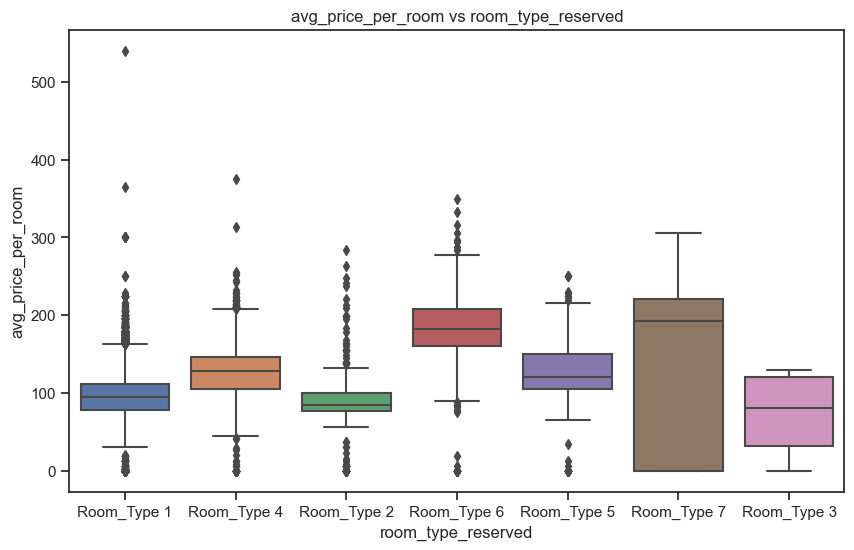

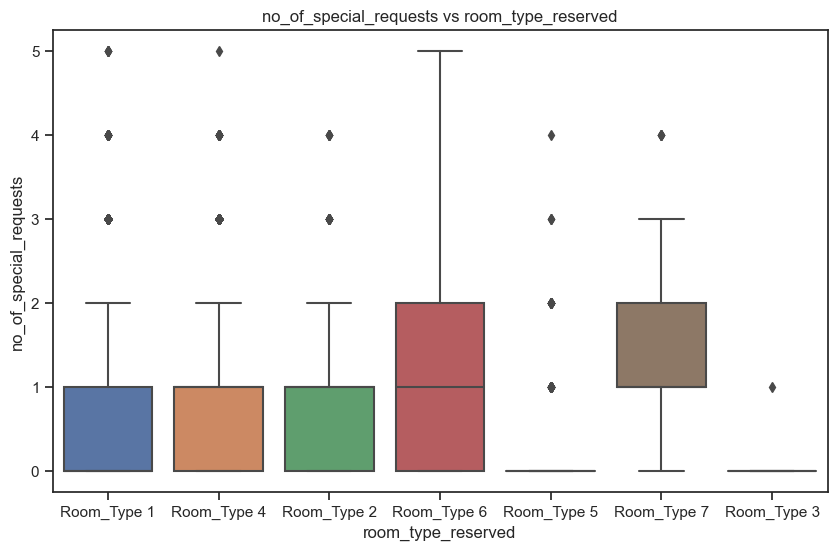

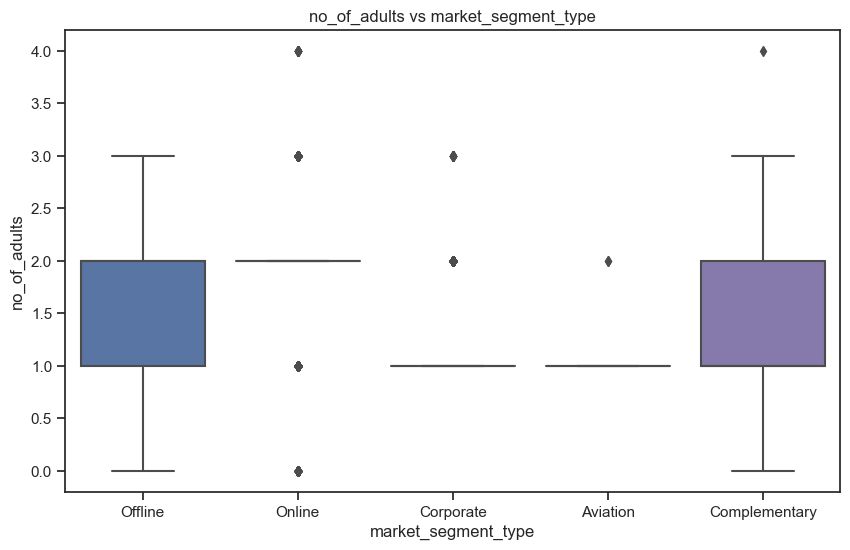

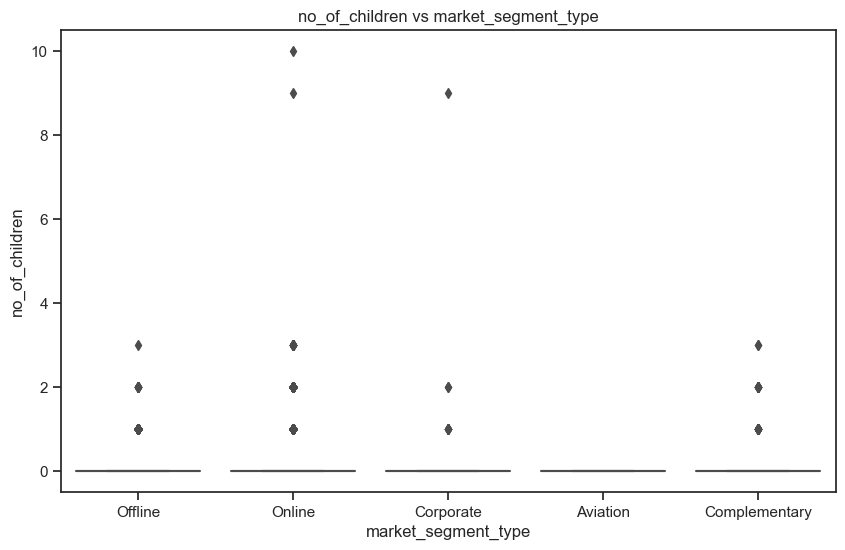

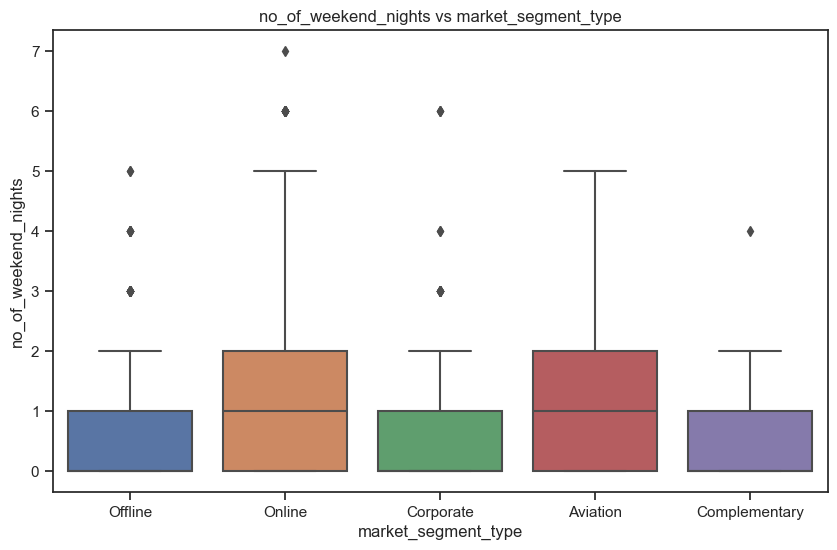

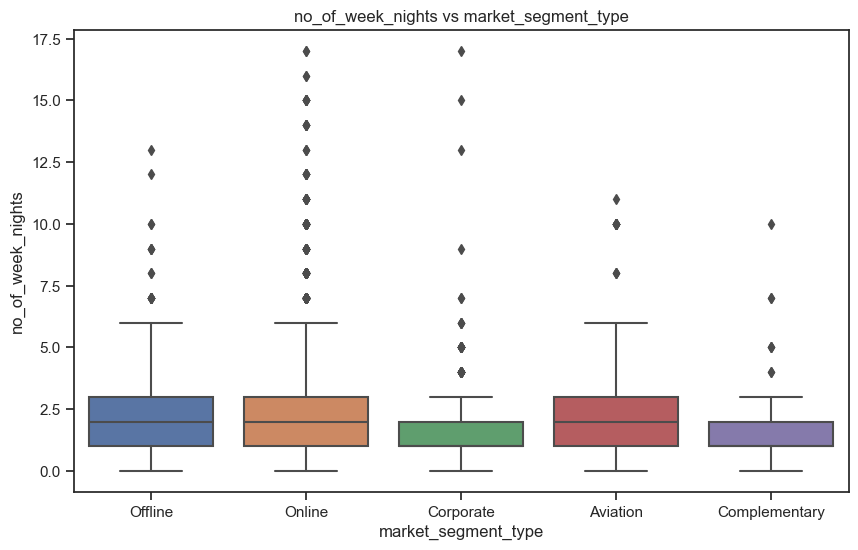

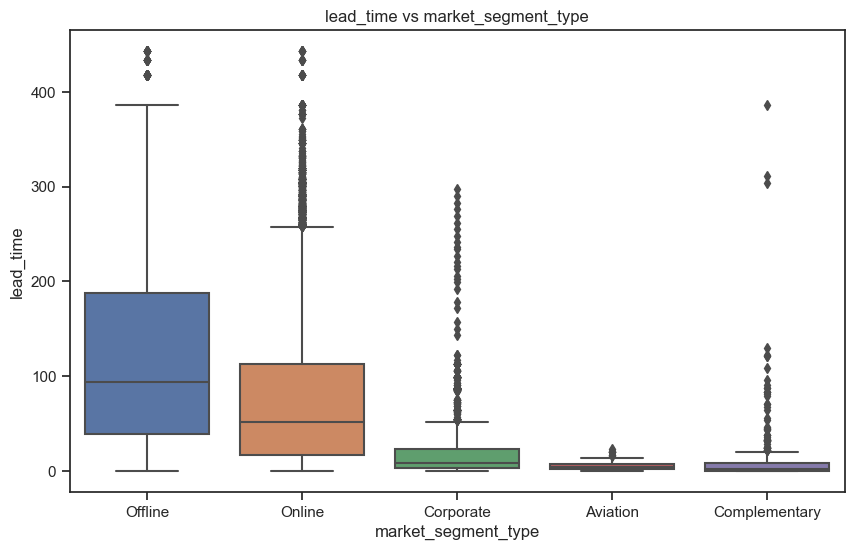

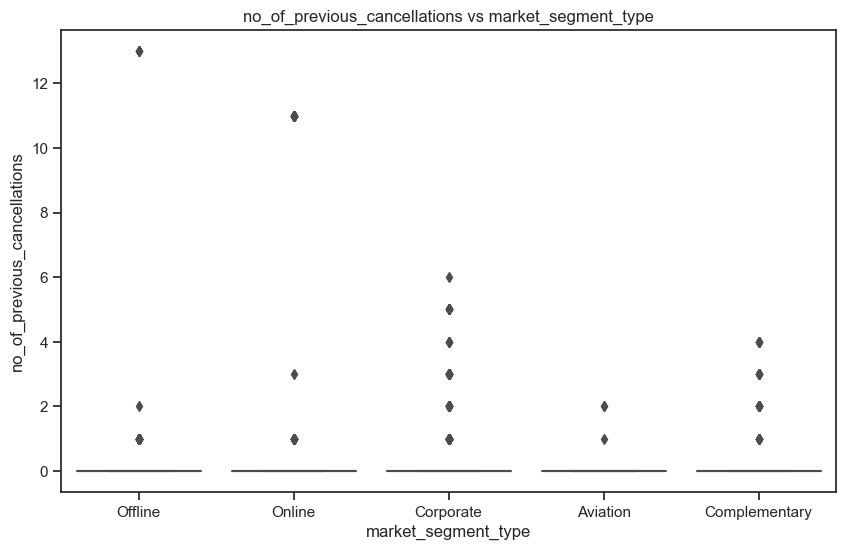

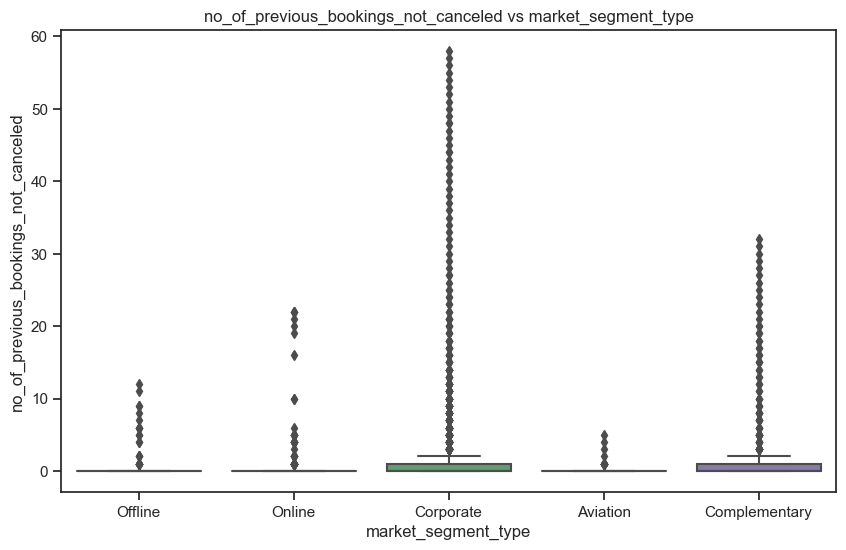

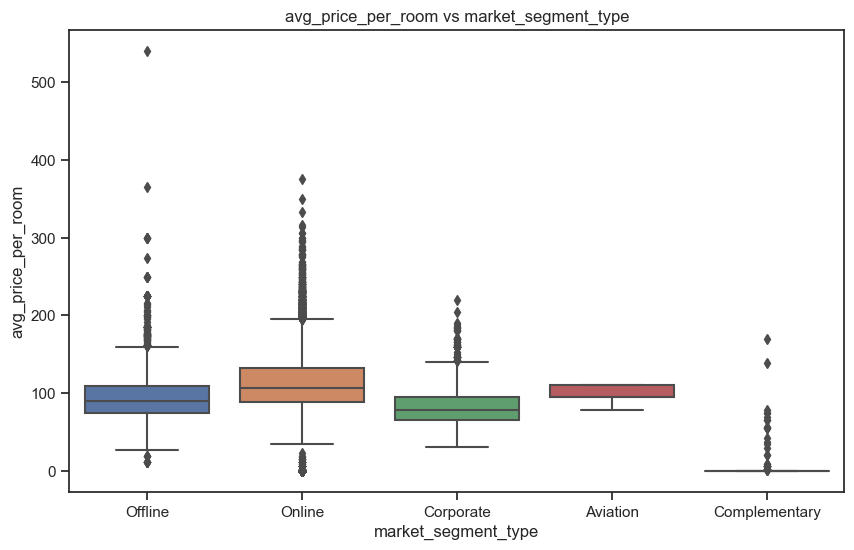

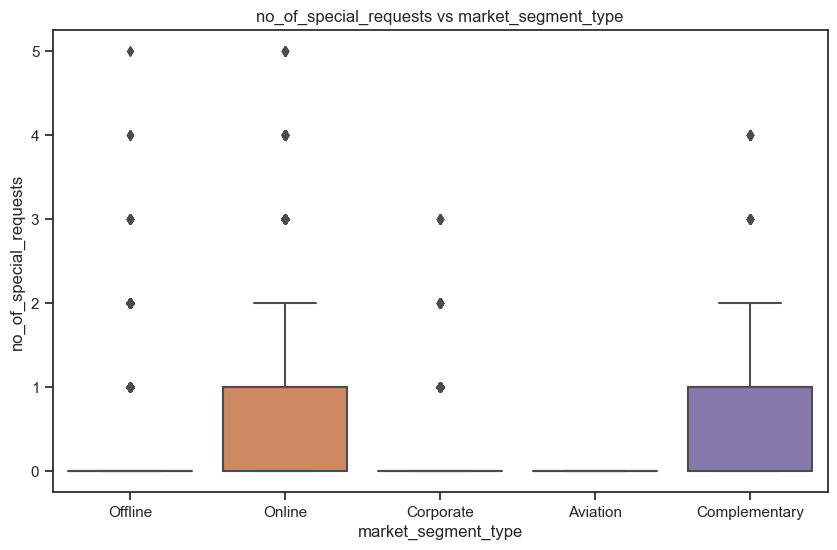

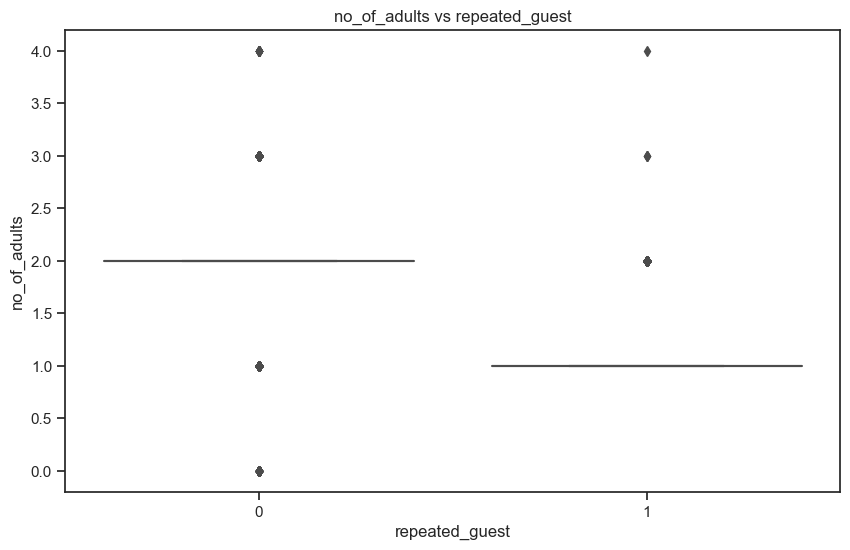

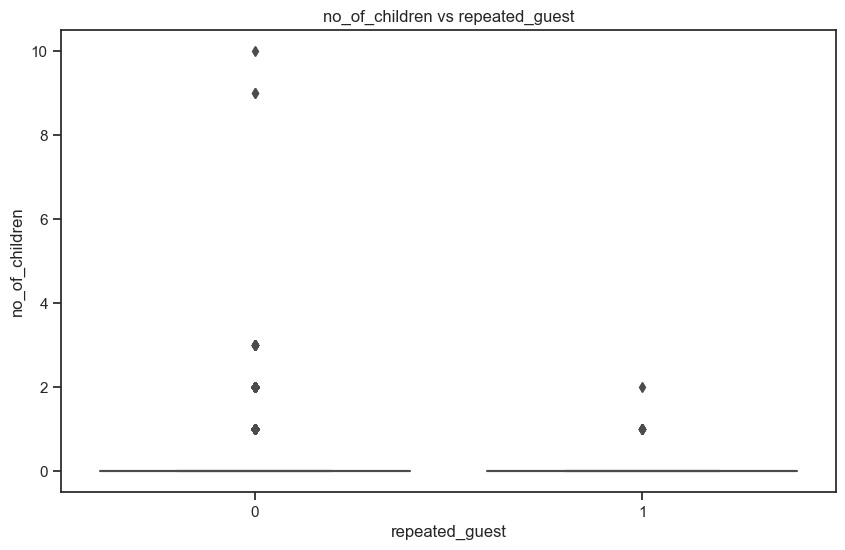

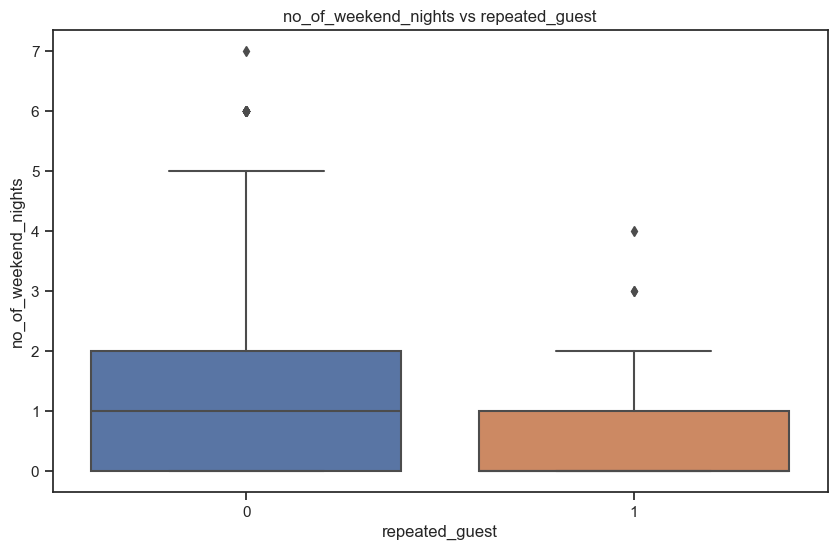

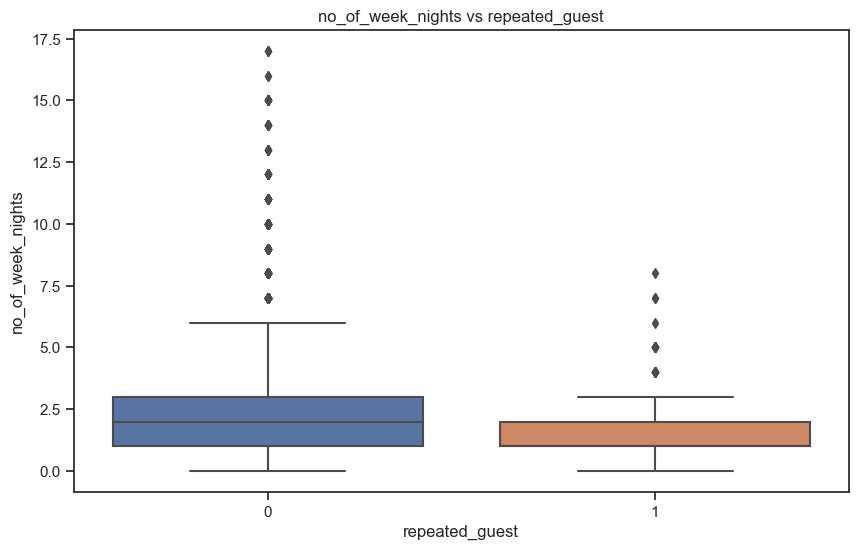

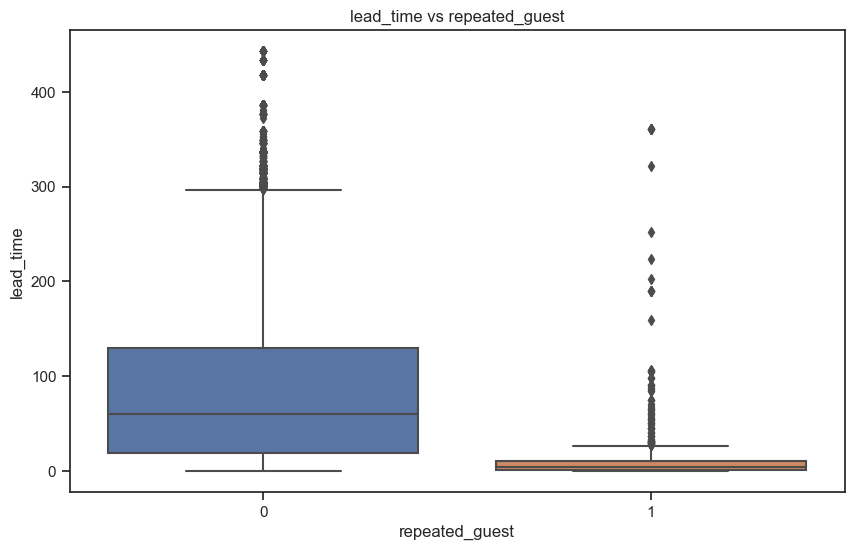

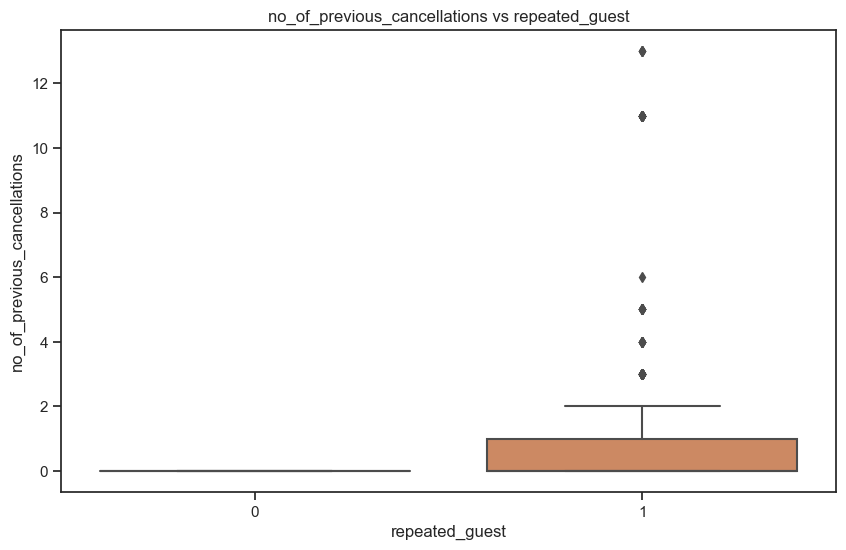

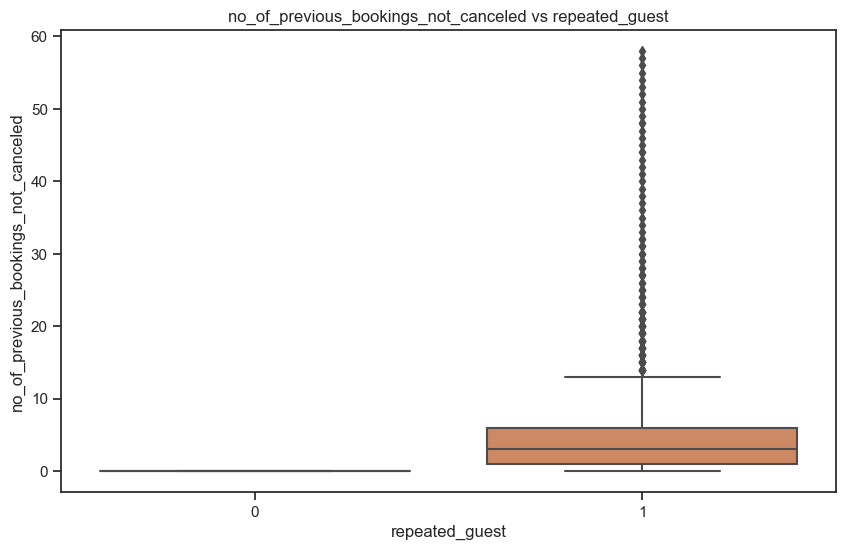

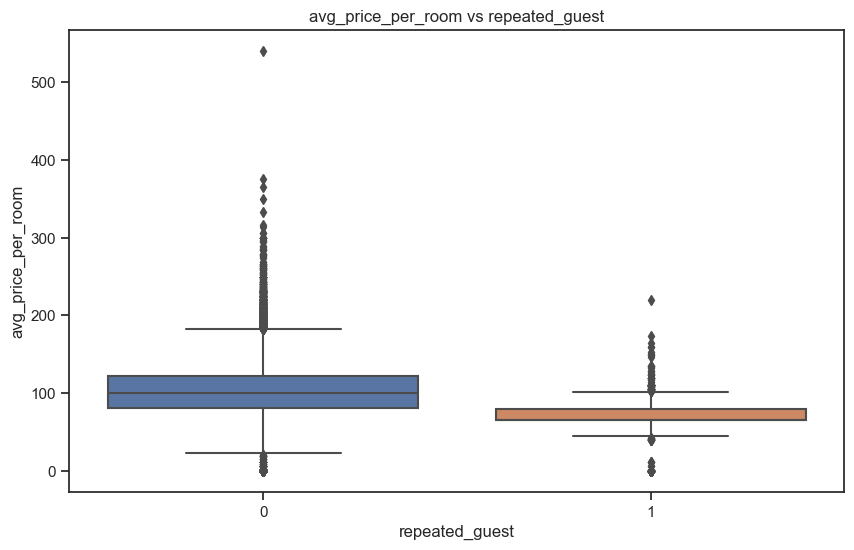

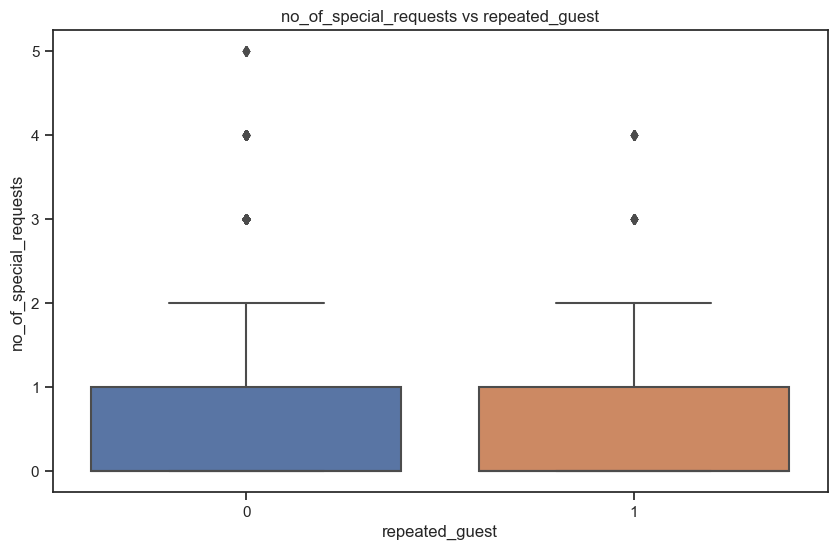

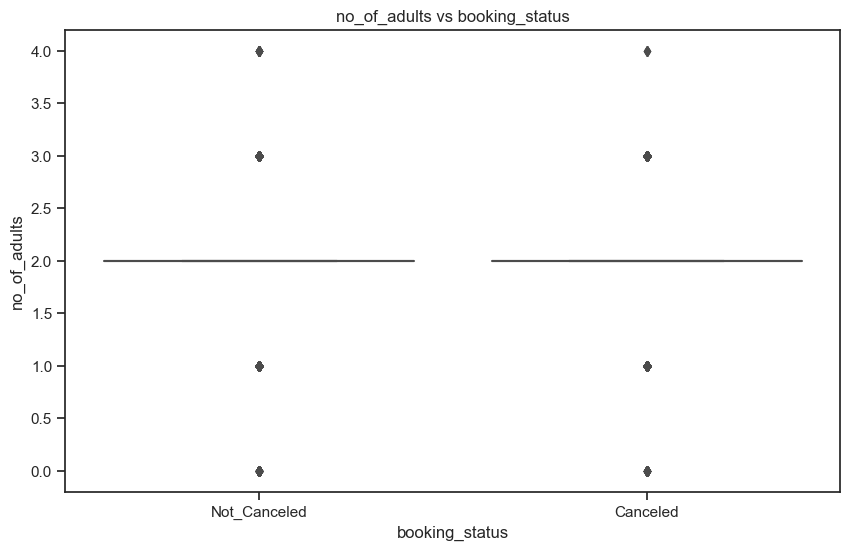

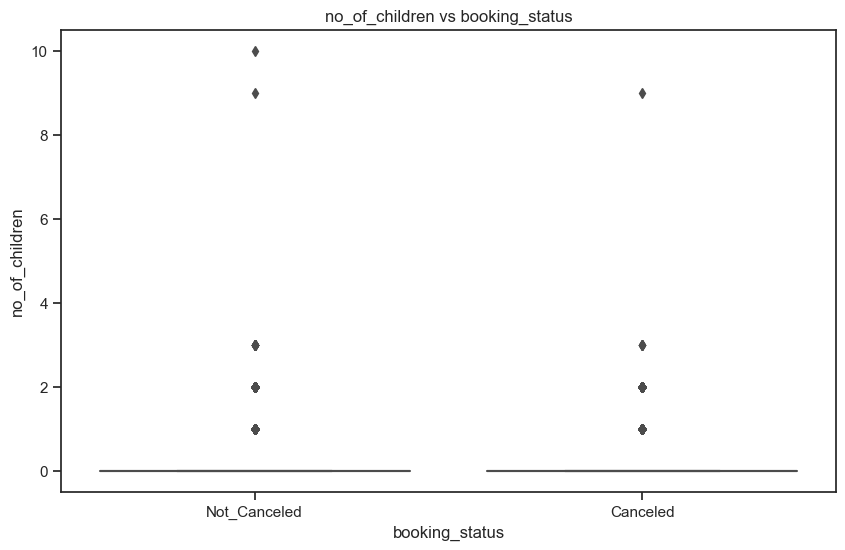

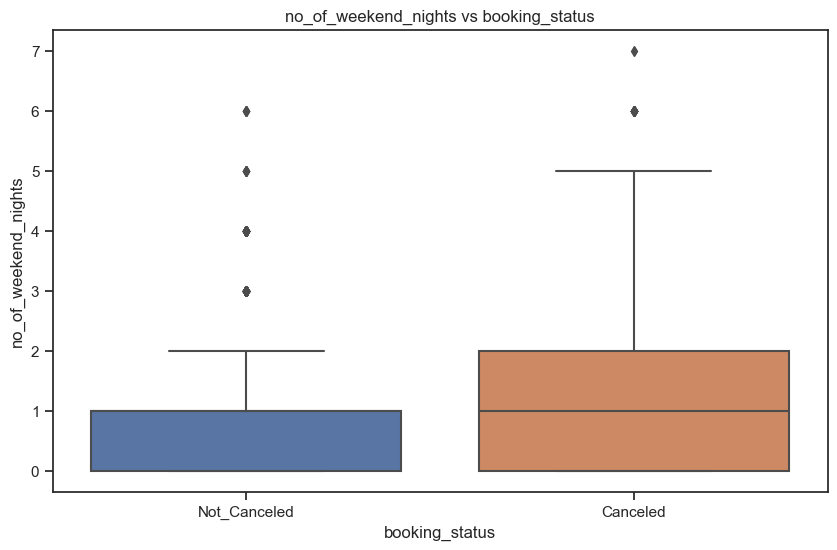

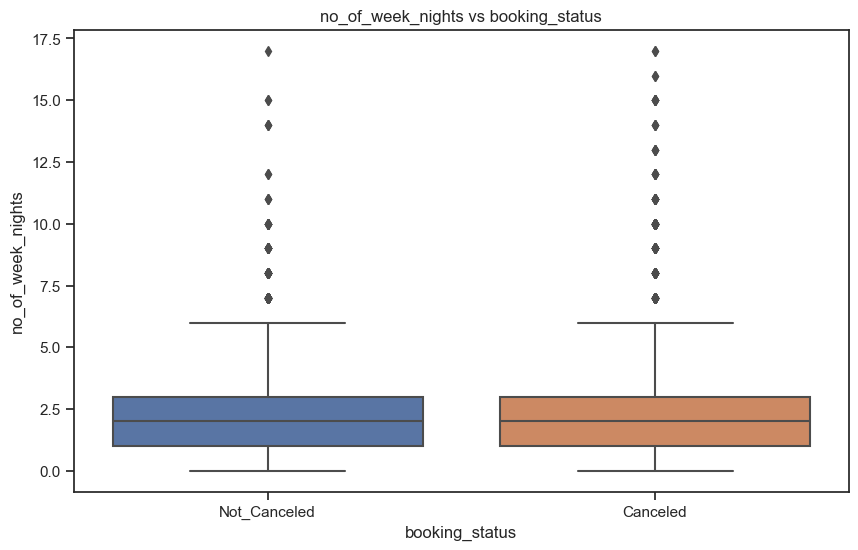

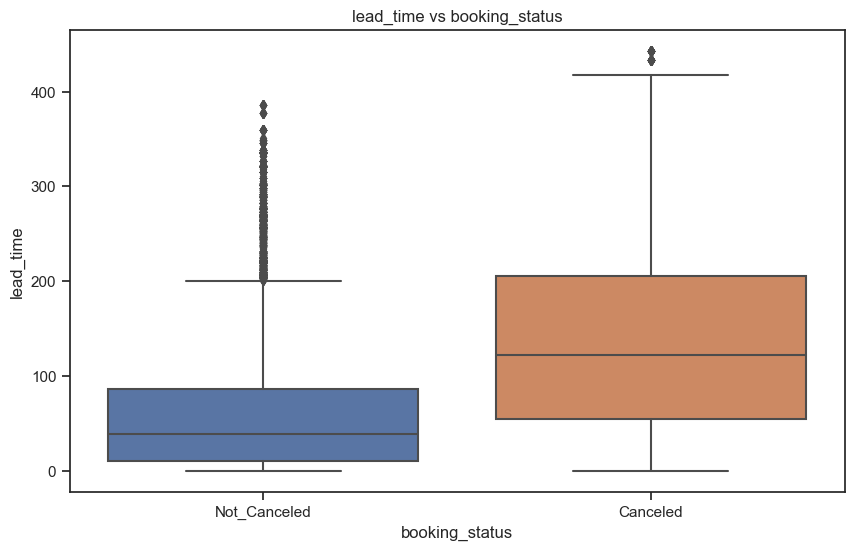

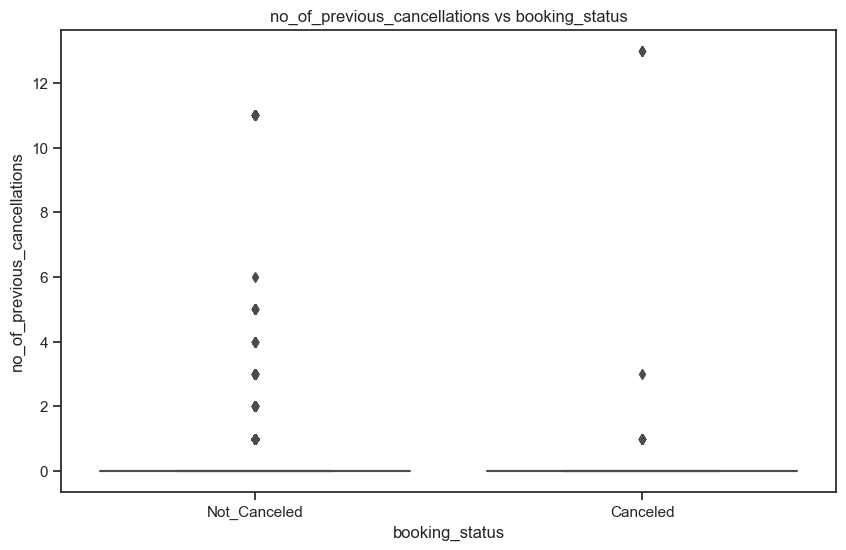

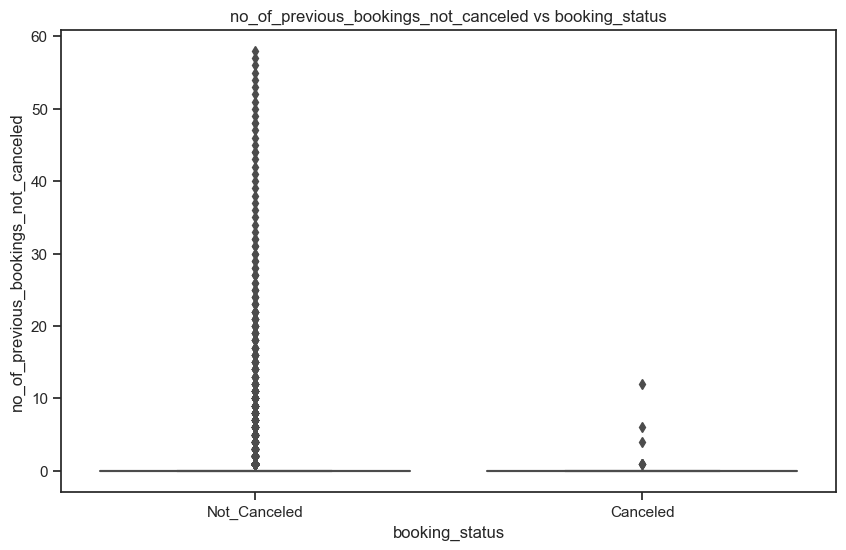

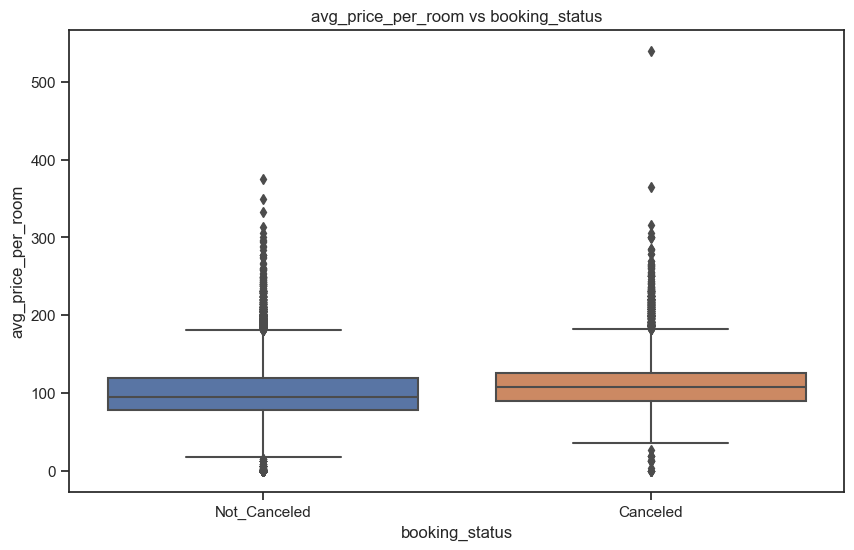

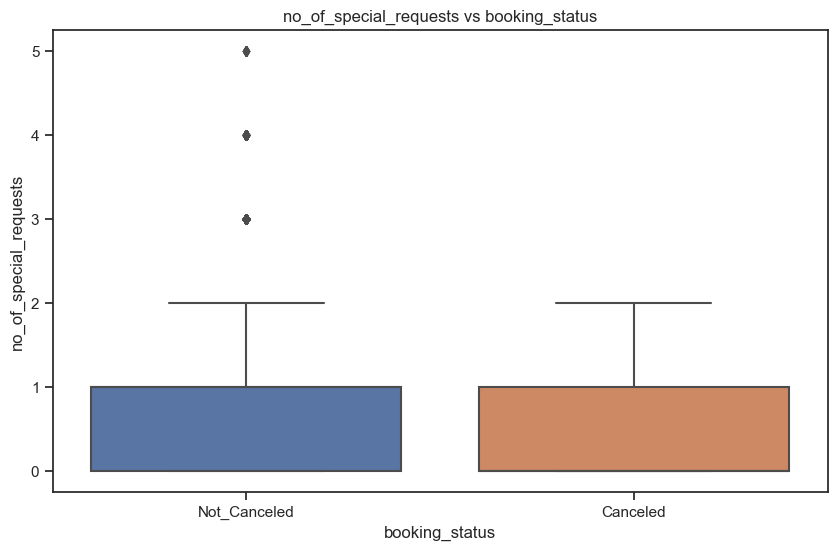


Relationships between categorical variables:


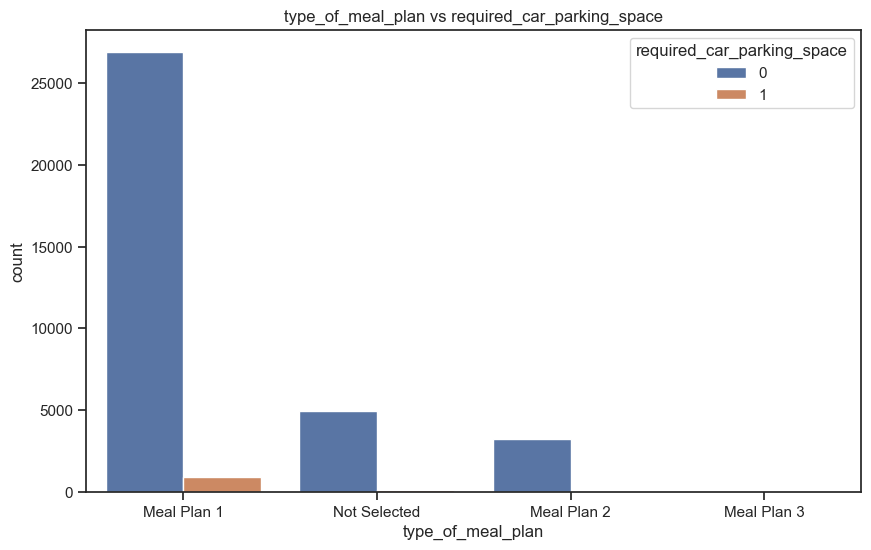

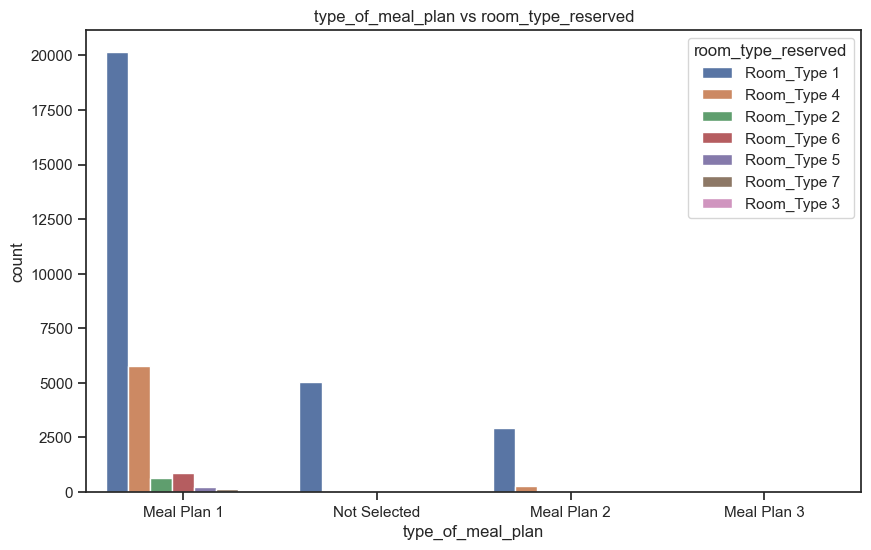

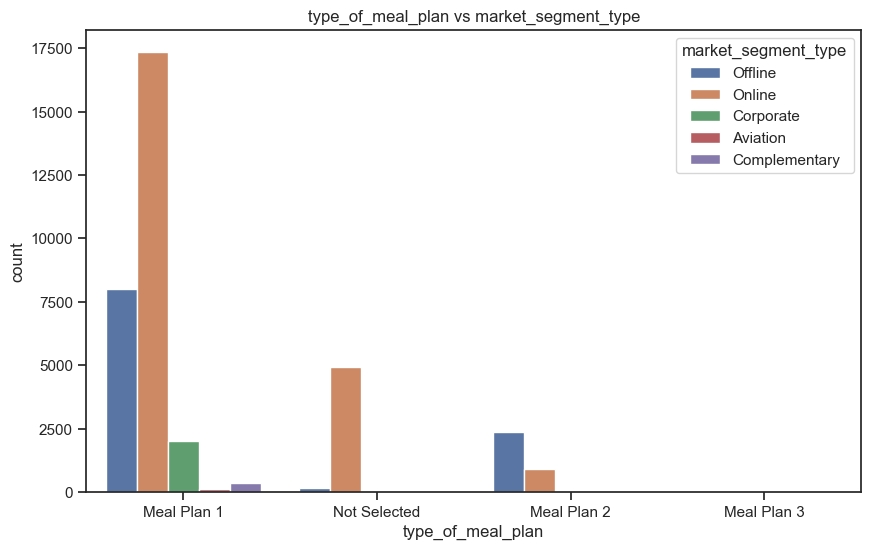

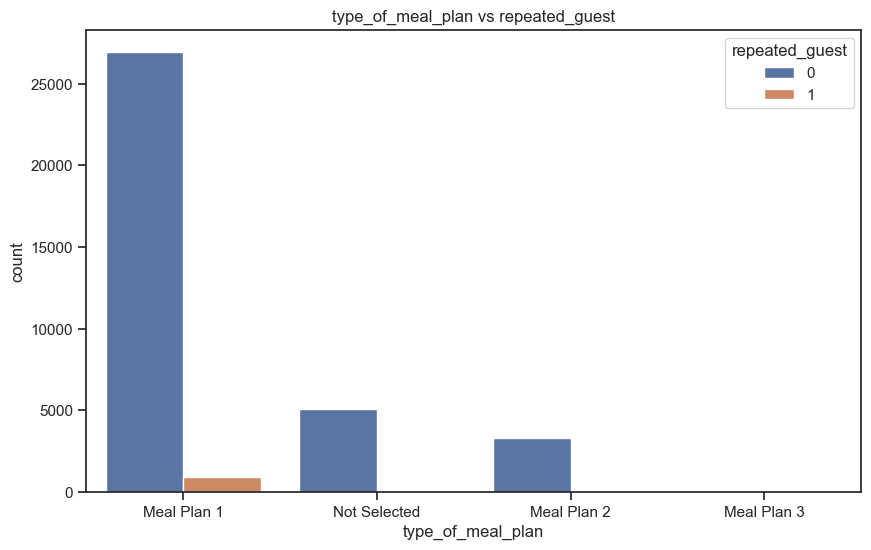

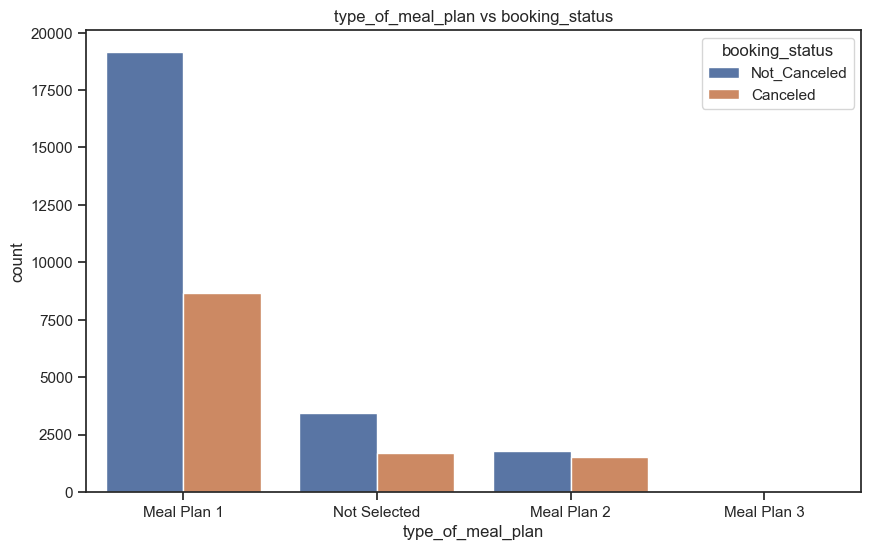

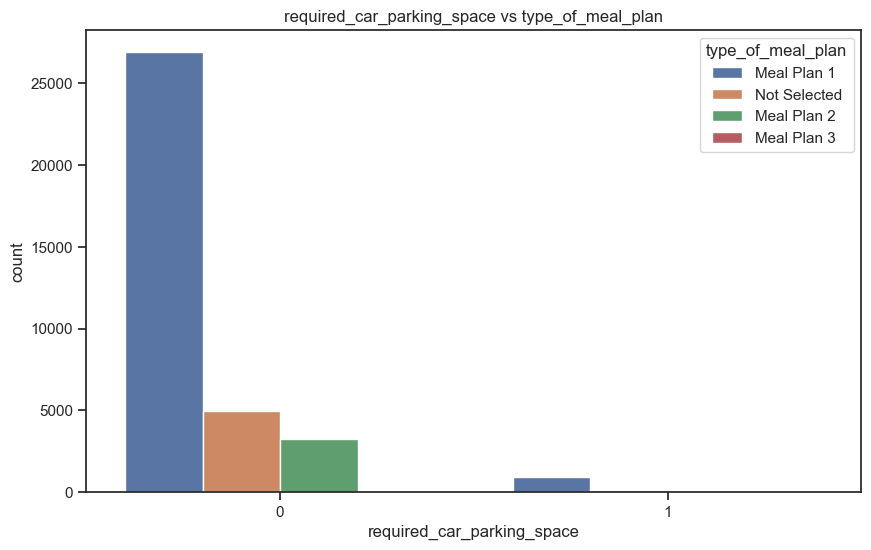

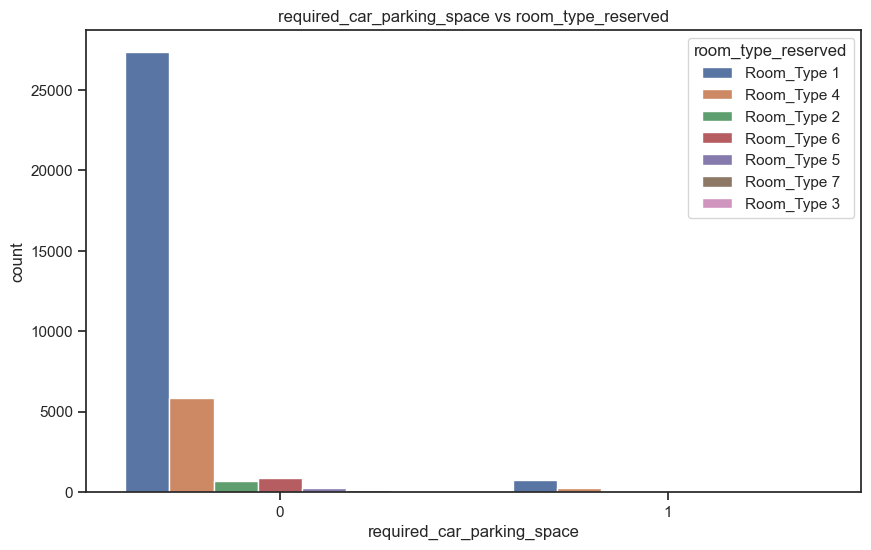

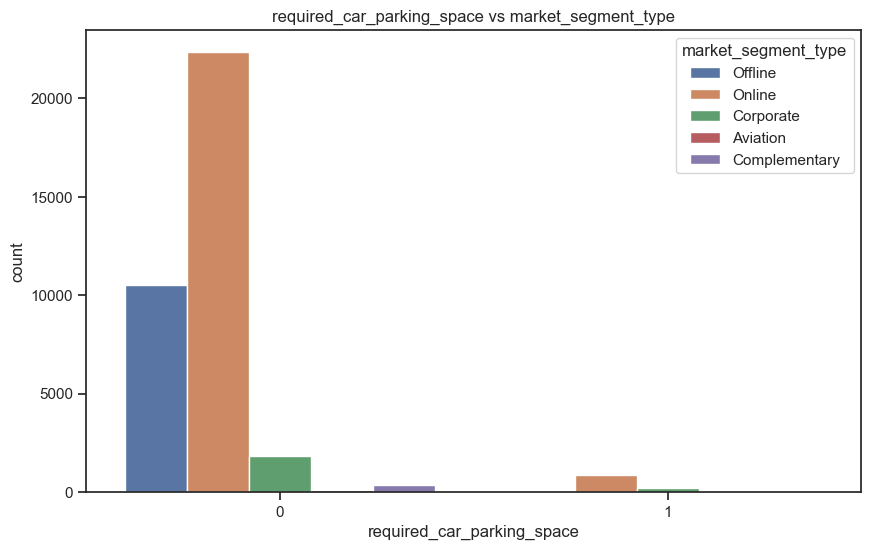

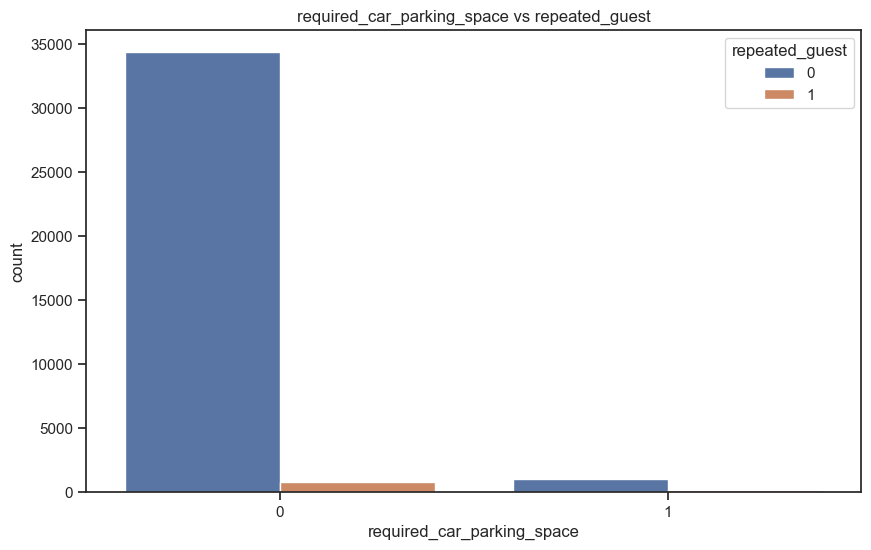

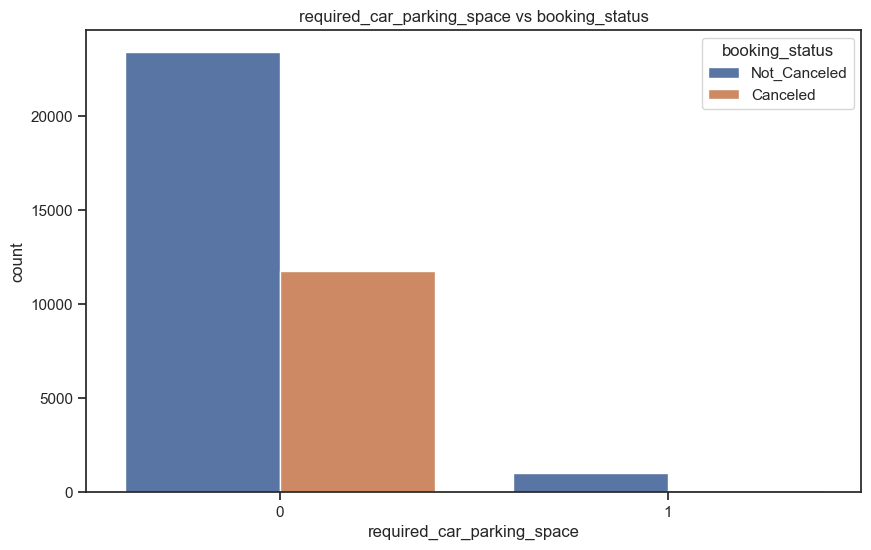

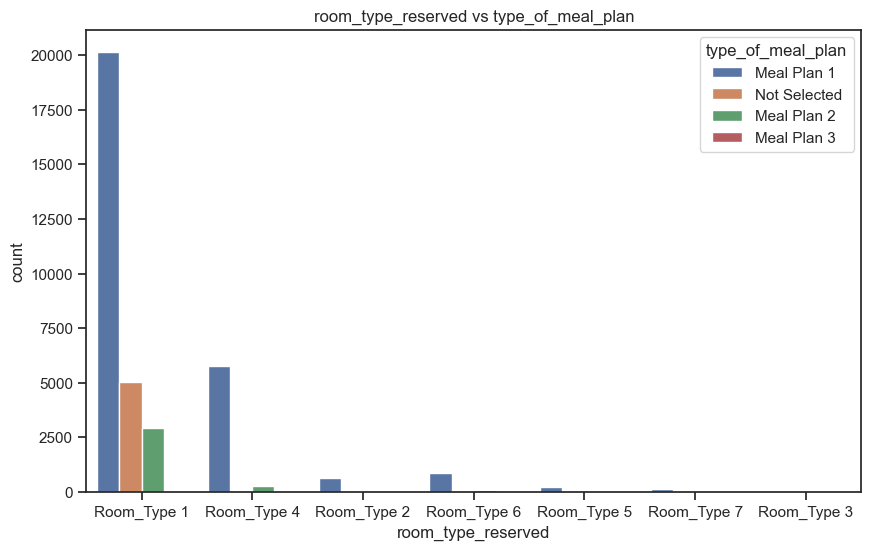

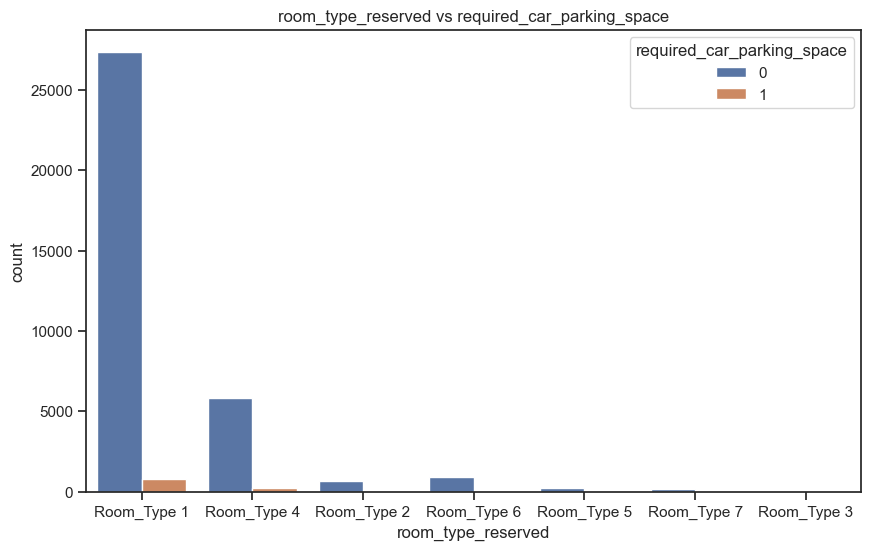

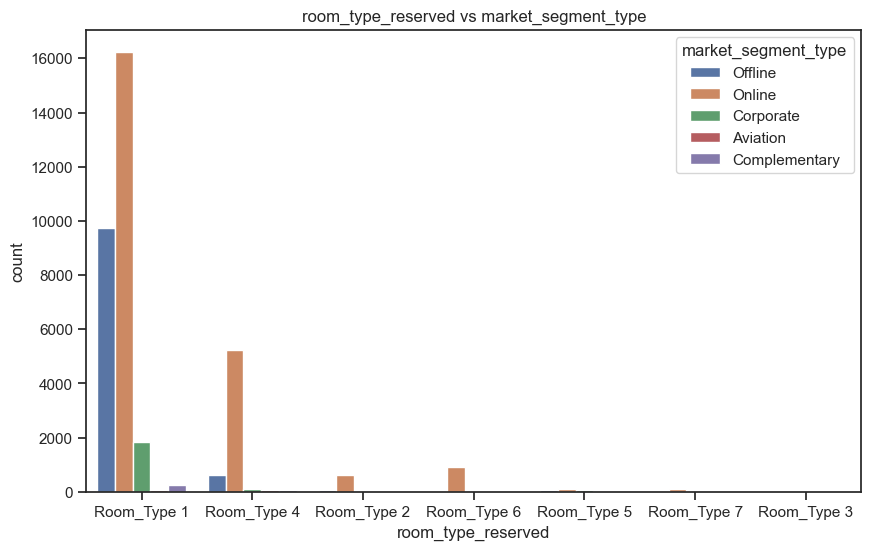

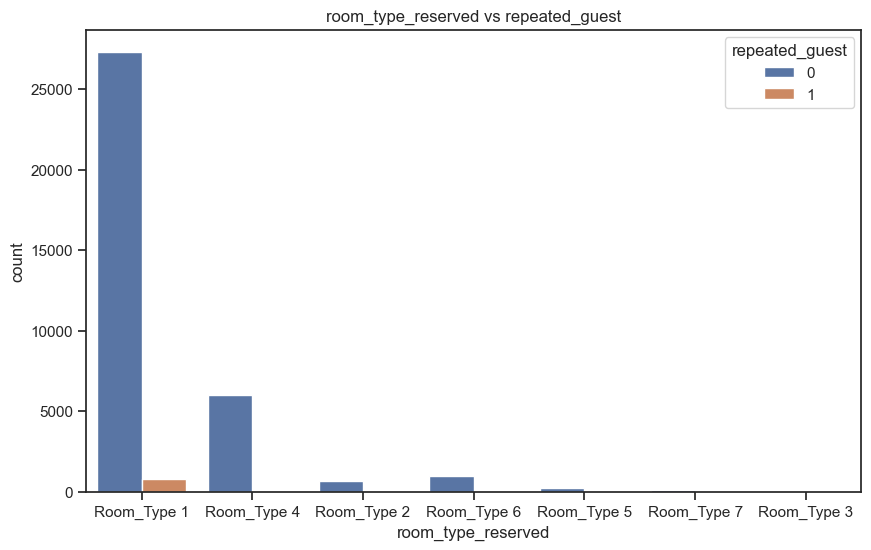

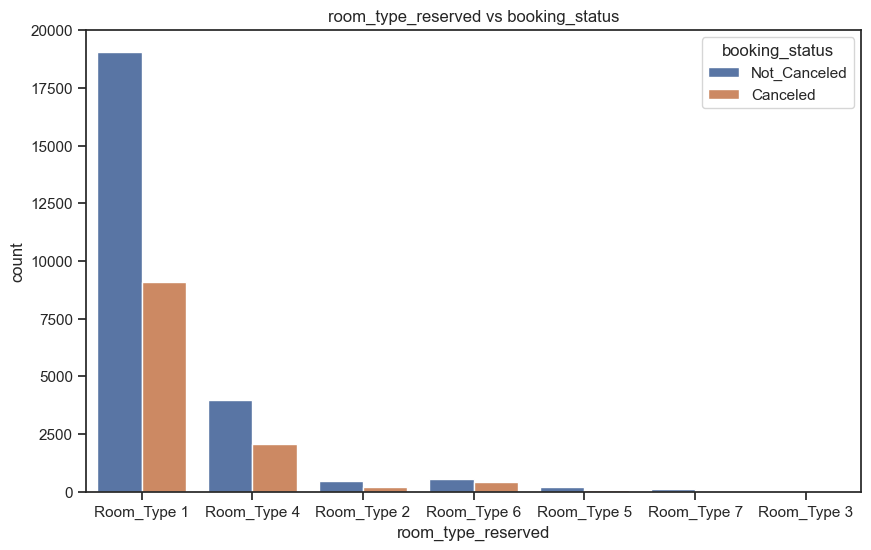

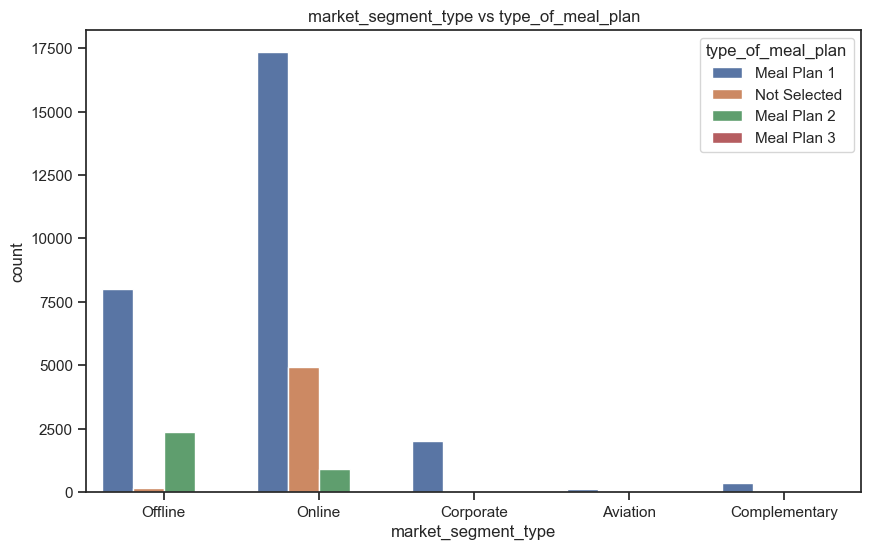

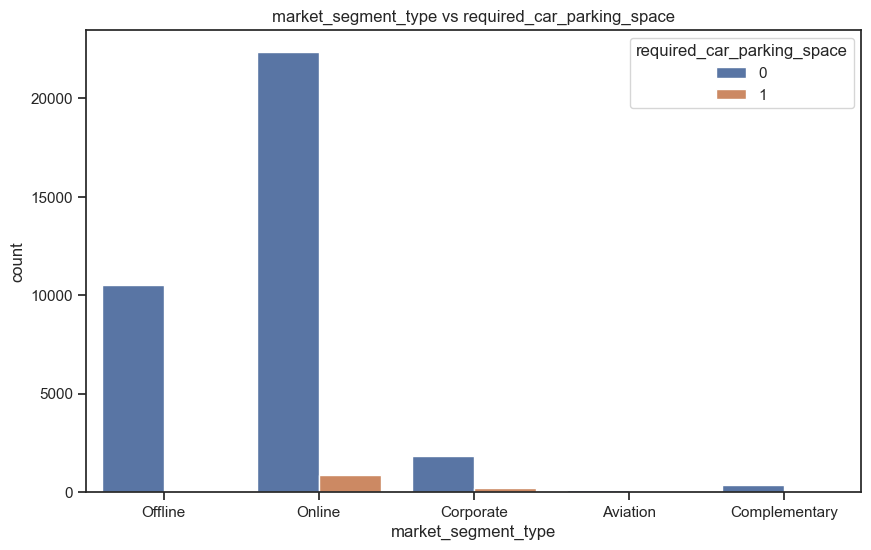

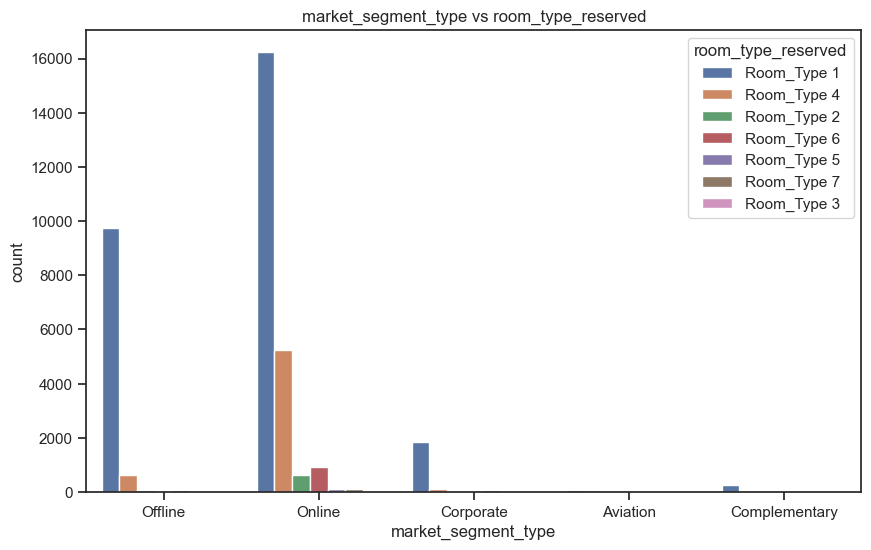

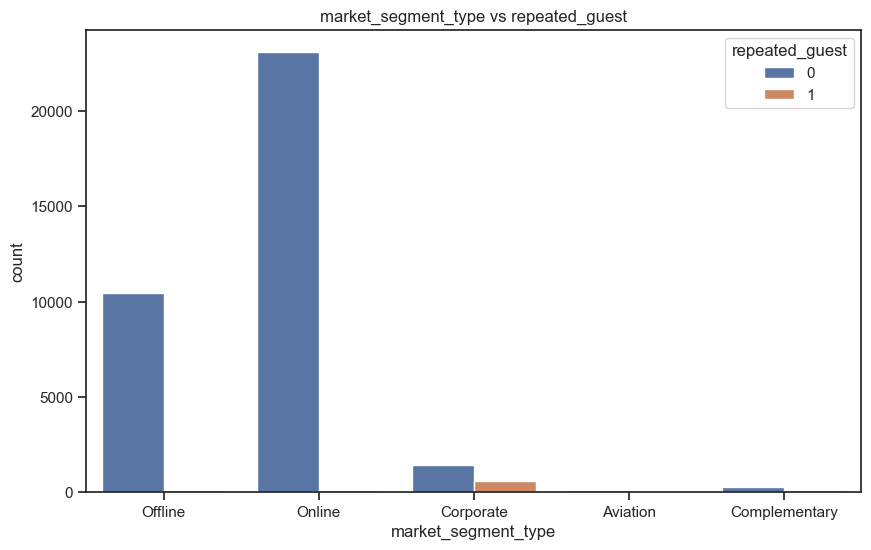

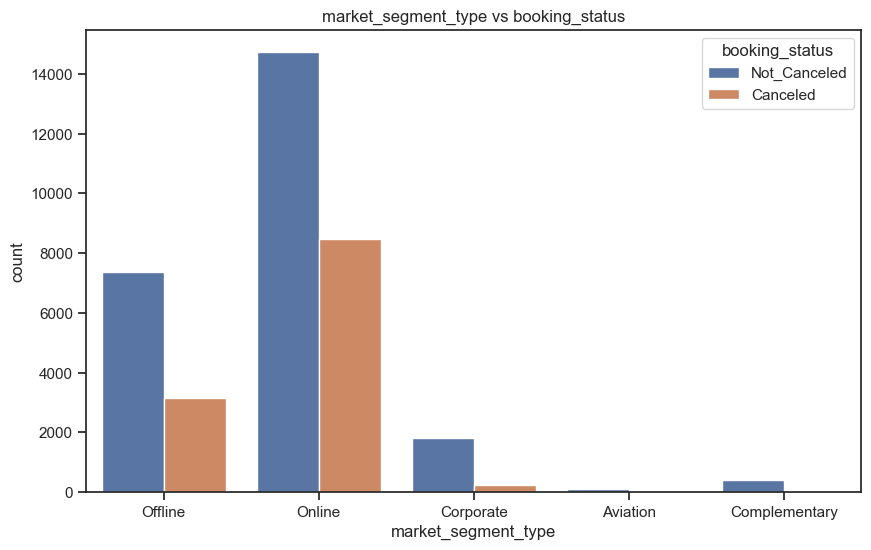

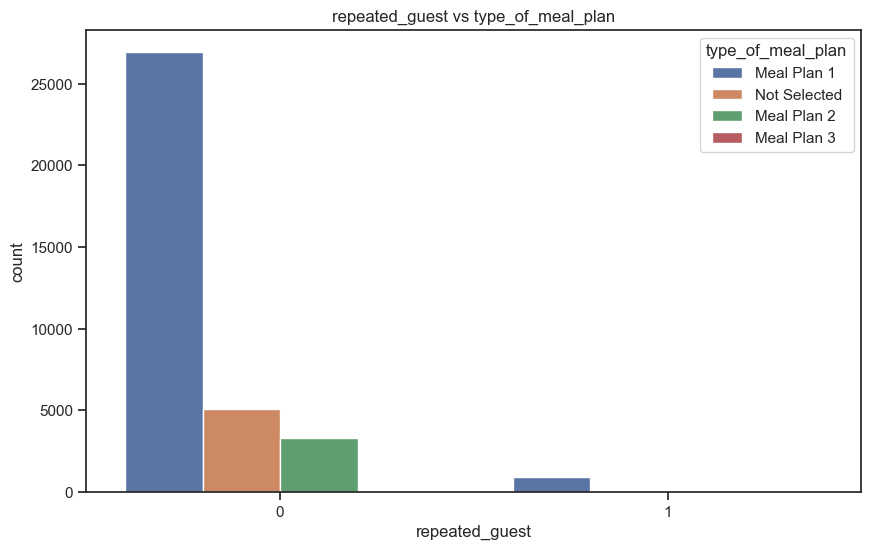

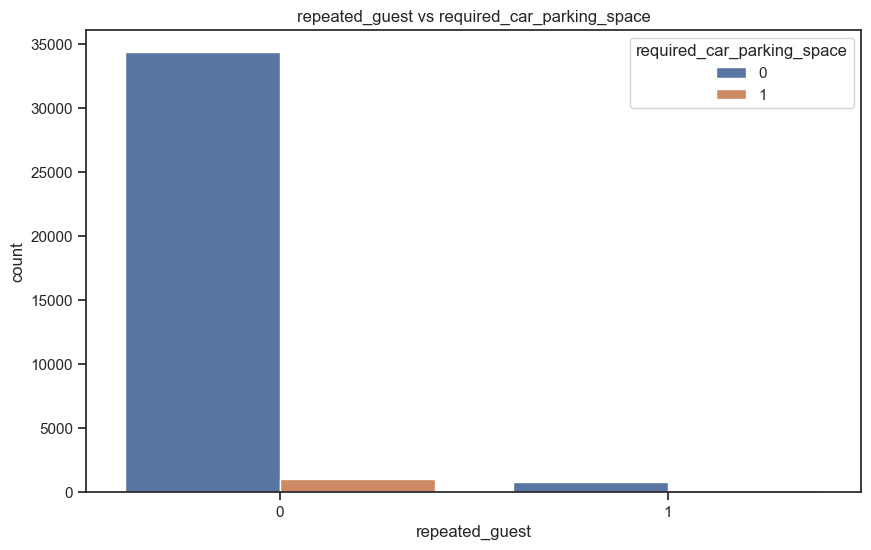

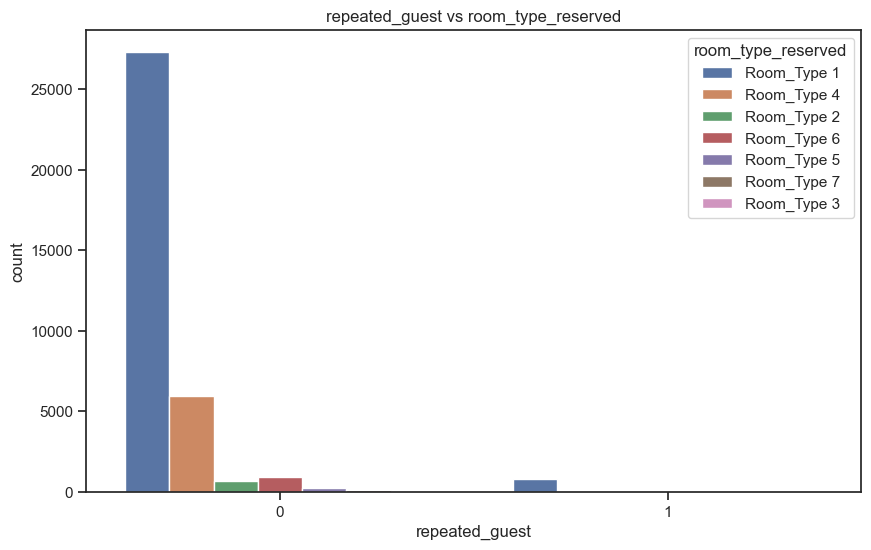

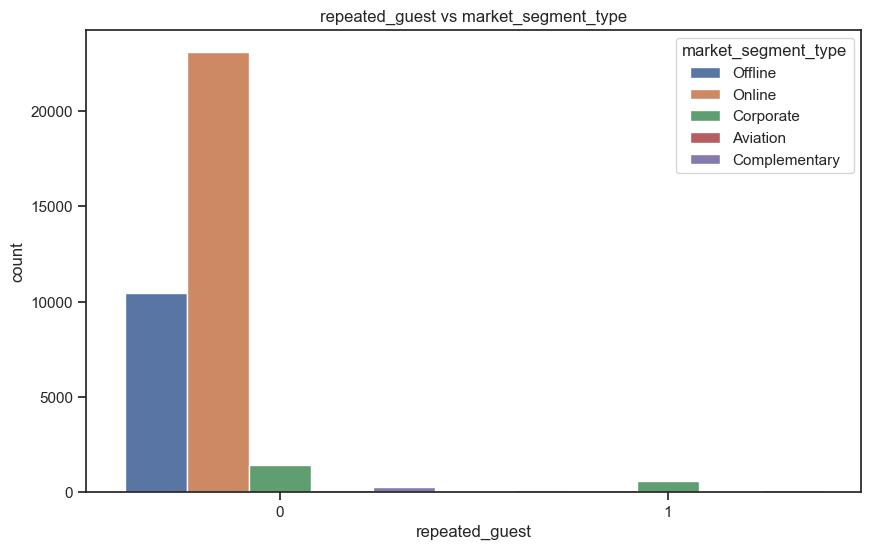

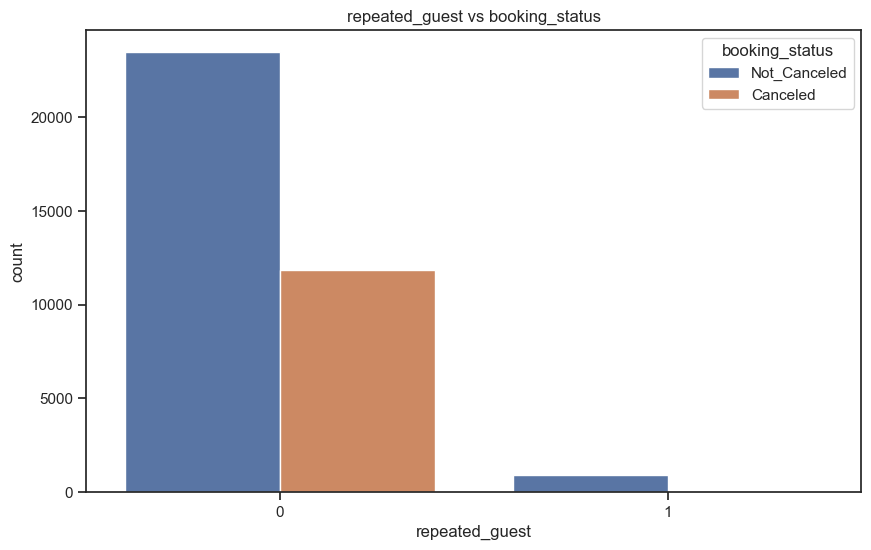

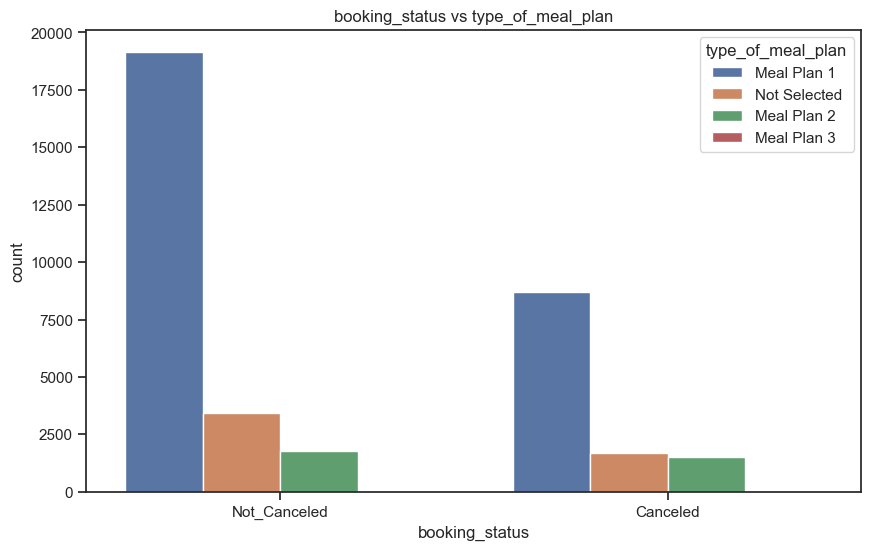

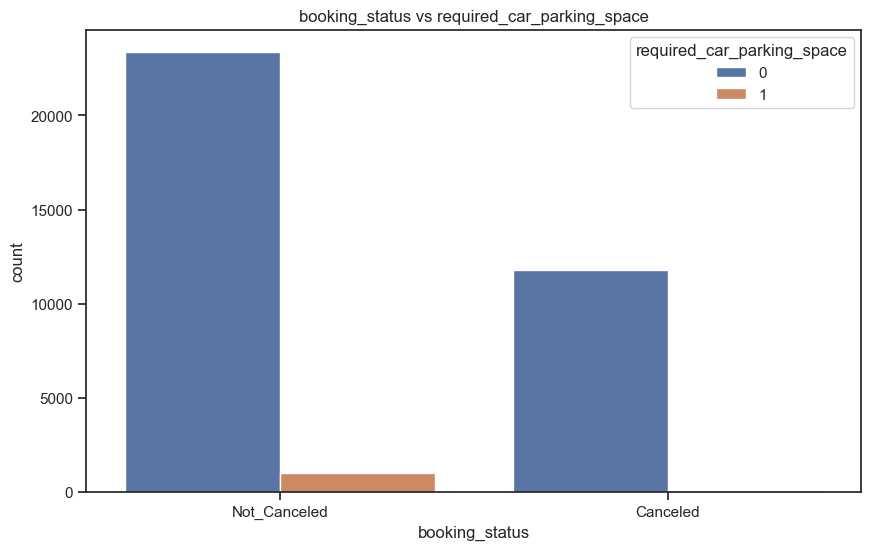

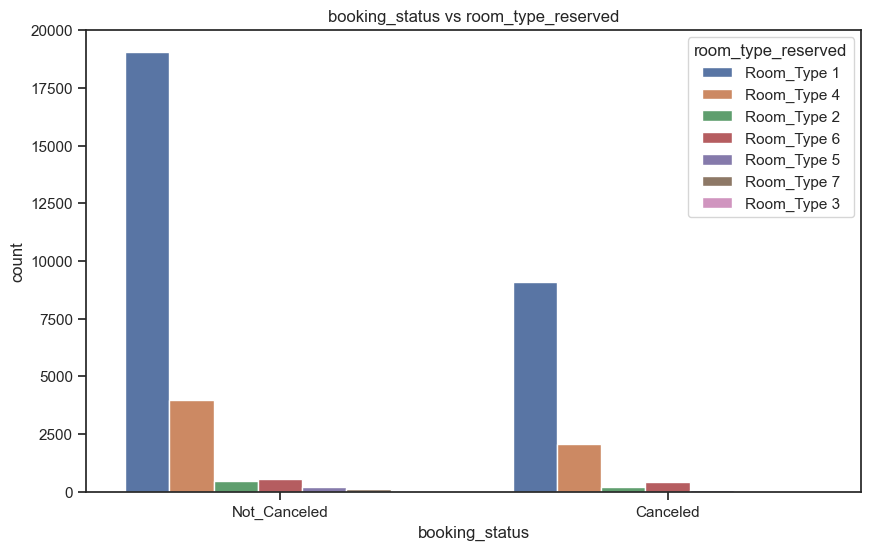

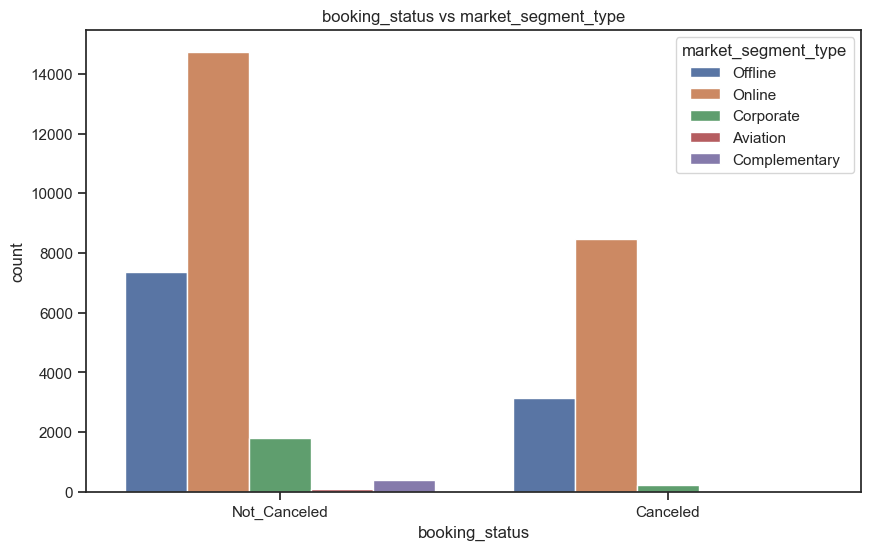

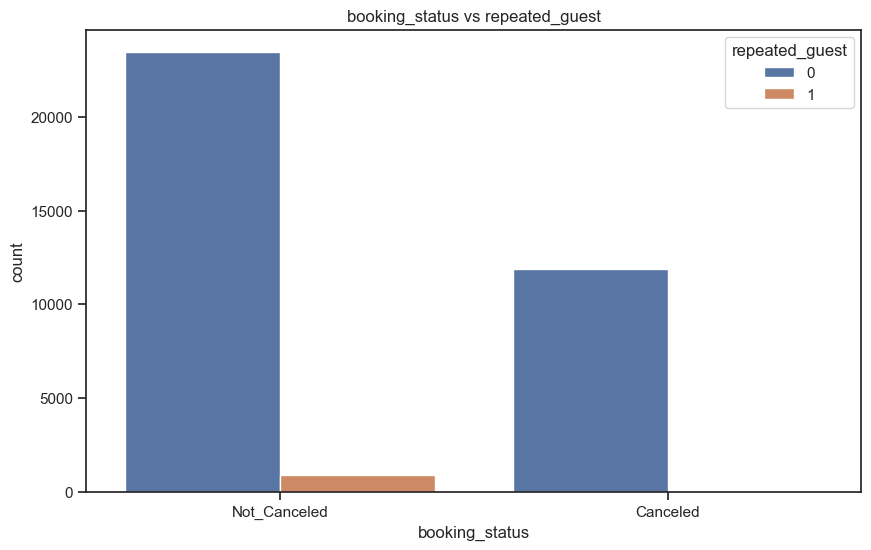

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
hotel_data = pd.read_csv('hotel_reservation.csv')

# Numerical vs. numerical variables
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                  'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                  'avg_price_per_room', 'no_of_special_requests']

print("Relationships between numerical variables:")
sns.set(style="ticks")
sns.pairplot(hotel_data[numerical_cols], diag_kind="kde")
plt.show()

# Numerical vs. categorical variables
categorical_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest', 'booking_status']

print("\nRelationships between numerical and categorical variables:")
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=hotel_data)
        plt.title(f"{num_col} vs {cat_col}")
        plt.show()

# Categorical vs. categorical variables
print("\nRelationships between categorical variables:")
for cat_col1 in categorical_cols:
    for cat_col2 in categorical_cols:
        if cat_col1 != cat_col2:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=cat_col1, hue=cat_col2, data=hotel_data)
            plt.title(f"{cat_col1} vs {cat_col2}")
            plt.show()